<a href="https://colab.research.google.com/github/sivani-tutika/LLM-Growth-Training/blob/main/Wiki_103_dataset_Benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

tnssivani_shakespeare_dataset_path = kagglehub.dataset_download('tnssivani/shakespeare-dataset')

print('Data source import complete.')


<a href="https://colab.research.google.com/github/sivani-tutika/LLM-Growth-Training/blob/main/When_to_grow_shakespeare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparing Best models of pre-trained methods

Comperative Survey:

Wiki - 2

| Model | Category | Validation Loss | Training FLOPs | Memory | Time |
|-|-|-|-|-|-|
|Stacking|-|-|-|-|-|
|LiGO Depth only|-|-|-|-|-|
|CrossLiGO depth only|-|-|-|-|-|
|StackLiGO depth only|-|-|-|-|-|


Wiki - 103

| Model | Category | Validation Loss | Training FLOPs | Memory | Time |
|-|-|-|-|-|-|
|Stacking|-|-|-|-|-|
|LiGO Depth only|-|-|-|-|-|
|CrossLiGO depth only|-|-|-|-|-|
|StackLiGO depth only|-|-|-|-|-|


Shakespeare

| Model | Category | Validation Loss | Training FLOPs | Memory | Time |
|-|-|-|-|-|-|
|Stacking|-|-|-|-|-|
|LiGO Depth only|-|-|-|-|-|
|CrossLiGO depth only|-|-|-|-|-|
|StackLiGO depth only|-|-|-|-|-|


---

"When to grow policy"

Wiki-2

| Model | Category | Validation Loss | Training FLOPs | Memory | Time |
|-|-|-|-|-|-|
|Periodic|-|-|-|-|-|
|Convergence|-|-|-|-|-|
|LipGrow|-|-|-|-|-|
|FRAWGrow|-|-|-|-|-|

Wiki-103

| Model | Category | Validation Loss | Training FLOPs | Memory | Time |
|-|-|-|-|-|-|
|Periodic|-|-|-|-|-|
|Convergence|-|-|-|-|-|
|LipGrow|-|-|-|-|-|
|FRAWGrow|-|-|-|-|-|

Shakespeare

| Model | Category | Validation Loss | Training FLOPs | Memory | Time |
|-|-|-|-|-|-|
|Periodic|-|-|-|-|-|
|Convergence|-|-|-|-|-|
|LipGrow|-|-|-|-|-|
|FRAWGrow|-|-|-|-|-|

# Libraries

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126

Looking in indexes: https://download.pytorch.org/whl/cu126
   ---------------------------------------- 0.0/6.1 MB ? eta -:--:--
   ---------------------------------------- 6.1/6.1 MB 31.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.5 GB ? eta -:--:--
   ---------------------------------------- 0.0/2.5 GB 124.1 MB/s eta 0:00:20
    --------------------------------------- 0.0/2.5 GB 122.0 MB/s eta 0:00:21
   - -------------------------------------- 0.1/2.5 GB 120.0 MB/s eta 0:00:21
   - -------------------------------------- 0.1/2.5 GB 119.7 MB/s eta 0:00:21
   - -------------------------------------- 0.1/2.5 GB 118.5 MB/s eta 0:00:21
   -- ------------------------------------- 0.1/2.5 GB 114.6 MB/s eta 0:00:21
   -- ------------------------------------- 0.2/2.5 GB 113.0 MB/s eta 0:00:21
   -- ------------------------------------- 0.2/2.5 GB 112.8 MB/s eta 0:00:21
   --- ------------------------------------ 0.2/2.5 GB 111.0 MB/s eta 0:00:21
   --- -----------------

In [1]:
!pip install pytorch
!pip install transformers
!pip install datasets
!pip install calflops
!pip install matplotlib

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pytorch)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import math
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from transformers import GPT2Tokenizer, DataCollatorForLanguageModeling
from datasets import load_dataset
from calflops import calculate_flops
import matplotlib.pyplot as plt
import time

# Settings

In [3]:
# LiGO_bool = True
# emb_size = 256
# new_emb_size = 512
# block_size = 128
# multi_heads = 2
# batch_size = 16
# epochs = 3
# learning_rate = 3e-4
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# num_small_layers = 4
# multi_heads = 2
# num_large_layers = 8


LiGO_bool = True
emb_size = 128
new_emb_size = 256
block_size = 64
multi_heads = 2
batch_size = 16
epochs = 3
learning_rate = 3e-4
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_small_layers = 4
multi_heads = 2
num_large_layers = 8
batches_per_epoch = 10

# Datasets

## Shakespeare

In [5]:
# import torch

# path = '/kaggle/input/shakespeare-dataset/shakespeare_dat.txt'
# # Load and process Shakespeare dataset
# with open(path, 'r') as f:
#     dat = f.read()

# chars = sorted(list(set(dat)))
# stoi = {ch: i for i, ch in enumerate(chars)}
# itos = {i: ch for i, ch in enumerate(chars)}
# encode = lambda s: [stoi[c] for c in s]
# decode = lambda i: ''.join([itos[l] for l in i])

# # Convert text to tensor
# data = torch.tensor(encode(dat))

# # Train-test split (90% train, 10% validation)
# n = int(0.9 * len(data))
# shakespeare_train = data[:n]
# shakespeare_val = data[n:]

# #Dataset wikitext-2
# dataset = load_dataset('wikitext', 'wikitext-2-v1')

# Dataset wikitext-103
dataset = load_dataset('wikitext', 'wikitext-103-raw-v1')

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# padding token
tokenizer.add_special_tokens({'pad_token': '[PAD]'})
vocab_size = len(tokenizer)

def tokenize_function(examples):
    return tokenizer(examples['text'], return_tensors='pt', truncation=True, padding='max_length', max_length=block_size)

tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=["text"])
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

train_dataset = tokenized_datasets["train"]
val_dataset = tokenized_datasets["validation"]
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size, collate_fn=data_collator)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=batch_size, collate_fn=data_collator)


test-00000-of-00001.parquet:   0%|          | 0.00/733k [00:00<?, ?B/s]

train-00000-of-00002.parquet:   0%|          | 0.00/157M [00:00<?, ?B/s]

train-00001-of-00002.parquet:   0%|          | 0.00/157M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/657k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/1801350 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Map:   0%|          | 0/4358 [00:00<?, ? examples/s]

Map:   0%|          | 0/1801350 [00:00<?, ? examples/s]

Map:   0%|          | 0/3760 [00:00<?, ? examples/s]

In [6]:
train_dataloader = list(train_dataloader)
val_dataloader = list(val_dataloader)

In [ ]:

# # Hyperparameters
# LiGO_bool = True
# block_size = 8
# batch_size = 2048
# val_batch_size = 2048
# vocab_size = len(chars)
# emb_size = 32
# new_emb_size = 64
# num_small_layers = 4
# multi_heads = 2
# num_large_layers = 8
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [ ]:
# import torch
# from torch.utils.data import Dataset, DataLoader
# import numpy as np

# # Load Shakespeare text from file
# with open('/content/shakespeare_dat.txt', 'r') as f:
#     dat = f.read()

# # Character mappings
# chars = sorted(list(set(dat)))
# stoi = {ch: i for i, ch in enumerate(chars)}
# itos = {i: ch for i, ch in enumerate(chars)}
# encode = lambda s: [stoi[c] for c in s]  # Convert text to integer list
# decode = lambda i: ''.join([itos[l] for l in i])  # Convert int list to text


# # Hyperparameters (Global)
# block_size = 8
# batch_size = 2048
# val_batch_size = 2048
# vocab_size = len(chars)
# train_frac = 0.9  # Fraction for train-validation split


# # Convert text data to tensor
# data = torch.tensor(encode(dat), dtype=torch.long)

# # Shuffle and Split Dataset
# def shuffle_and_split(data, train_frac=0.9):
#     n = int(train_frac * len(data))  # Split point
#     indices = torch.randperm(len(data)).tolist()  # Shuffle indices
#     train_data = data[indices[:n]]
#     val_data = data[indices[n:]]
#     return train_data, val_data

# # Shuffle and split data
# train_data, val_data = shuffle_and_split(data)

# # Define a PyTorch Dataset
# class ShakespeareDataset(Dataset):
#     def __init__(self, data, block_size):
#         self.data = data
#         self.block_size = block_size

#     def __len__(self):
#         return len(self.data) - self.block_size

#     def __getitem__(self, idx):
#         x = self.data[idx:idx + self.block_size]
#         y = self.data[idx + 1:idx + self.block_size + 1]
#         return x, y

# # Create DataLoader objects with custom variable names
# shakespeare_train_dataset = ShakespeareDataset(train_data, block_size)
# shakespeare_val_dataset = ShakespeareDataset(val_data, block_size)

# shakespeare_train_loader = DataLoader(shakespeare_train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
# shakespeare_val_loader = DataLoader(shakespeare_val_dataset, batch_size=val_batch_size, shuffle=False, drop_last=True)


# Transformer Architecture

In [ ]:
# LiGO_bool = True
# emb_size = 256
# new_emb_size = 512
# block_size = 128
# multi_heads = 2
# batch_size = 16
# epochs = 3
# learning_rate = 3e-4
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# num_small_layers = 4
# multi_heads = 2
# num_large_layers = 8

## Basic blocks

In [7]:
class AttentionHead(torch.nn.Module):
    def __init__(self, big=False):
        super(AttentionHead, self).__init__()
        self.k = torch.nn.Linear(new_emb_size if big else emb_size, new_emb_size if big else emb_size, bias=False)
        self.q = torch.nn.Linear(new_emb_size if big else emb_size, new_emb_size if big else emb_size, bias=False)
        self.v = torch.nn.Linear(new_emb_size if big else emb_size, new_emb_size if big else emb_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size,block_size)))
    def forward(self, e):
        keys = self.k(e)
        queries = self.q(e)
        values = self.v(e)
        ret = keys @ queries.transpose(1, 2)*(1.0/math.sqrt(keys.size(-1)))
        ret = torch.masked_fill(ret, self.tril==0, -torch.inf)
        ret = torch.softmax(ret, 2)
        ret = ret @ values
        return ret

In [8]:
class MultiHead(torch.nn.Module):
    def __init__(self, big=False):
        super(MultiHead, self).__init__()
        self.head1 = AttentionHead(big)
        self.head2 = AttentionHead(big)
        self.mh_lin = torch.nn.Linear(multi_heads*(new_emb_size if big else emb_size), new_emb_size if big else emb_size, bias=False)
        self.drop = torch.nn.Dropout(0.1)
    def forward(self, inp):
        x1 = self.head1(inp)
        x2 = self.head2(inp)
        return self.mh_lin(self.drop(torch.cat([x1,x2], dim=2))).relu()

In [9]:
class PositionalEncoding(torch.nn.Module):

    def __init__(self, d_model: int, dropout: float = 0.1, max_len: int = 5000):
        super().__init__()
        self.dropout = torch.nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, 1, d_model)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = x + self.pe[:x.size(0)]
        return self.dropout(x)

In [10]:
class Block(torch.nn.Module):
    def __init__(self, big=False):
        super(Block, self).__init__()
        self.multihead = MultiHead(big)
        self.l_norm_1 = torch.nn.LayerNorm(new_emb_size if big else emb_size)
        self.l_norm_2 = torch.nn.LayerNorm(new_emb_size if big else emb_size)
        self.ffn = torch.nn.Linear(new_emb_size if big else emb_size, new_emb_size if big else emb_size)
        self.drop = torch.nn.Dropout(0.1)
    def forward(self, inp):
        m = self.l_norm_1(inp + self.multihead(inp))
        m = self.l_norm_2(m + self.ffn(self.drop(m)).relu())
        return m

# Train & Validation


## Static methods

In [ ]:
# loss_fn = torch.nn.CrossEntropyLoss()

# @torch.no_grad()
# def validate(mdl, dataloader):
#     mdl.to(device)
#     mdl.eval()
#     total_loss = 0
#     num_batches = 0

#     torch.cuda.reset_peak_memory_stats(device)  # Reset memory stats

#     start_time = time.time()
#     for batch in dataloader:
#         inputs = batch["input_ids"].squeeze(1).to(device)
#         outputs = mdl(inputs)
#         loss = loss_fn(outputs.view(-1, vocab_size), inputs.view(-1))
#         total_loss += loss.item()
#         num_batches += 1

#     val_time = time.time() - start_time
#     max_memory = torch.cuda.max_memory_allocated(device) / (1024 ** 2)

#     print(f"Validation Time: {val_time:.2f}s, Max Memory Usage: {max_memory:.2f} MB")

#     return total_loss / num_batches


# import torch
# import time
# import psutil

# def get_cpu_memory():
#     """Returns current CPU memory usage in MB."""
#     process = psutil.Process()
#     return process.memory_info().rss / (1024 ** 2)  # Convert bytes to MB

# def train(mdl, optim, epochs, train_dataloader, val_dataloader):
#     mdl.to(device)

#     train_losses_epoch = []
#     val_losses_epoch = []

#     train_times = []   # Training time per epoch
#     val_times = []     # Validation time per epoch
#     gpu_memory_usage = []  # GPU memory per epoch
#     cpu_memory_usage = []  # CPU memory per epoch
#     flops_per_epoch = []   # FLOPs per epoch

#     for epoch in range(epochs):
#         start_time = time.time()
#         mdl.train()
#         total_loss = 0
#         num_batches = 0
#         total_flops = 0  # Track FLOPs for this epoch

#         torch.cuda.reset_peak_memory_stats(device)  # Reset GPU memory tracking

#         for batch in train_dataloader:
#             inputs = batch["input_ids"].squeeze(1).to(device)
#             optim.zero_grad()
#             outputs = mdl(inputs).to(device)
#             loss = loss_fn(outputs.view(-1, vocab_size), inputs.view(-1))
#             loss.backward()
#             optim.step()

#             total_loss += loss.item()
#             num_batches += 1

#             # Compute FLOPs for this batch
#             flops, _, _ = calculate_flops(model=mdl.to(device), kwargs={'inp': inputs},
#                                           print_detailed=False, print_results=False, output_as_string=False)
#             total_flops += flops  # Accumulate FLOPs

#             if num_batches % 100 == 0:
#                 print(f"{num_batches} processed")

#         train_time = time.time() - start_time  # Epoch training time
#         train_times.append(train_time)

#         # Store memory usage
#         max_gpu_memory = torch.cuda.max_memory_allocated(device) / (1024 ** 2)  # MB
#         max_cpu_memory = get_cpu_memory()  # MB

#         # gpu_memory_usage.append(max_gpu_memory)
#         cpu_memory_usage.append(max_cpu_memory)

#         avg_loss = total_loss / num_batches
#         train_losses_epoch.append(avg_loss)

#         # Validate model and track validation time + memory usage
#         val_start_time = time.time()
#         val_loss, _ = validate(mdl, val_dataloader)
#         val_time = time.time() - val_start_time
#         val_times.append(val_time)

#         val_losses_epoch.append(val_loss)

#         # Convert FLOPs to TFLOPs (TeraFLOPs)
#         flops_per_epoch.append(total_flops / 1e12)

#         print(f"Epoch {epoch+1}: Train Loss: {avg_loss:.4f}, Val Loss: {val_loss:.4f}, "
#               f"Train Time: {train_time:.2f}s, Val Time: {val_time:.2f}s, "
#               f"GPU Memory: MB, CPU Memory: {max_cpu_memory:.2f} MB, "
#               f"TFLOPs: {total_flops / 1e12:.4f}")

#     return {
#         "train_losses": train_losses_epoch,
#         "val_losses": val_losses_epoch,
#         "train_times": train_times,
#         "val_times": val_times,
#         "gpu_memory": gpu_memory_usage,
#         "cpu_memory": cpu_memory_usage,
#         "flops": flops_per_epoch  # Returning FLOPs per epoch
#     }


In [ ]:
# @torch.no_grad()
# def validate(mdl, dataloader):
#     mdl.eval()
#     total_loss = 0
#     num_batches = 0
#     val_losses = []
#     for batch in dataloader:
#         inputs = batch["input_ids"].squeeze(1).to(device)
#         outputs = mdl(inputs)
#         loss = loss_fn(outputs.view(-1, vocab_size), inputs.view(-1))
#         total_loss += loss.item()
#         num_batches += 1
#         if num_batches % 100 == 0:
#             val_losses.append(total_loss / num_batches)
#     return total_loss / num_batches, val_losses

# @torch.enable_grad()
# def train(mdl, optim, epochs, train_dataloader, val_dataloader):
#     # mdl.to(device)
#     train_losses = []
#     val_losses_epoch = []
#     for epoch in range(epochs):
#         mdl.train()
#         total_loss = 0
#         num_batches = 0
#         for batch in train_dataloader:
#             inputs = batch["input_ids"].squeeze(1).to(device)
#             optim.zero_grad()
#             outputs = mdl(inputs)
#             loss = loss_fn(outputs.view(-1, vocab_size), inputs.view(-1))
#             loss.backward()
#             optim.step()
#             total_loss += loss.item()
#             num_batches += 1
#             if num_batches % 100 == 0:
#                 train_losses.append(total_loss / num_batches)

#         avg_loss = total_loss / num_batches
#         val_loss, val_losses = validate(mdl, val_dataloader)
#         val_losses_epoch.extend(val_losses)
#         print(f"Epoch {epoch+1}, Train Loss: {avg_loss:.4f}, Val Loss: {val_loss:.4f}")

#     return train_losses, val_losses_epoch

In [11]:
loss_fn = torch.nn.CrossEntropyLoss()

@torch.no_grad()
def validate(mdl, dataloader, device=device):
    loss_fn = torch.nn.CrossEntropyLoss()
    mdl.eval()
    total_loss = 0
    num_batches = 0
    ix = torch.randint(len(dataloader), tuple([5]))
    # dataloader = list(dataloader)
    for index in ix:
        batch = dataloader[index]
        inputs = batch["input_ids"].detach().clone().detach().squeeze(1).to(device)
        labels = batch["labels"].detach().clone().detach().to(device)
        outputs = mdl(inputs)
        loss = loss_fn(outputs.view(-1, vocab_size), labels.view(-1))
        total_loss += loss.item()
        num_batches += 1
        del loss
        del outputs
    return total_loss / num_batches

@torch.enable_grad()
def train(mdl, optim, epochs, train_dataloader=train_dataloader, val_dataloader=val_dataloader, device=device):
    loss_fn = torch.nn.CrossEntropyLoss()
    mdl.to(device)
    val_losses_epoch = []
    total_flops = 0
    flops_per_epoch = []
    train_losses_epoch = []

    # train_dataloader = list(train_dataloader)
    for epoch in range(epochs):
        mdl.train()
        total_loss = 0
        num_batches = 0
        ix = torch.randint(len(train_dataloader), tuple([batches_per_epoch]))
        for index in ix:
            batch = train_dataloader[index]
            # print(f"Processing Batch: {index} in Epoch: {epoch}")
            inputs = batch["input_ids"].detach().clone().detach().to(device).squeeze(1)
            optim.zero_grad()
            outputs = mdl(inputs)
            labels = batch["labels"].detach().clone().detach().to(device)
            loss = loss_fn(outputs.view(-1, vocab_size), labels.view(-1))
            loss.backward()
            optim.step()
            total_loss += loss.item()
            num_batches += 1
            del loss
            del outputs
            flops, macs, params = calculate_flops(model=mdl, kwargs={'inp': inputs}, print_detailed=False, print_results=False, output_as_string=False)
            total_flops += flops
        avg_loss = total_loss / num_batches
        val_loss = validate(mdl, val_dataloader, device=device)
        val_losses_epoch.append(val_loss)
        train_losses_epoch.append(avg_loss)
        flops_per_epoch.append(total_flops)

        print(f"Epoch {epoch+1}, Train Loss: {avg_loss:.4f}, Val Loss: {val_loss:.4f}")

    return {
        "train_losses": train_losses_epoch,
        "val_losses": val_losses_epoch,
        "flops": flops_per_epoch
    }

## Periodic methods

In [ ]:
# loss = torch.nn.CrossEntropyLoss()
# torch.manual_seed(1337)
# def periodic_get_batch(split):
#     data = shakespeare_train if split == 'train' else shakespeare_val
#     ix = torch.randint(len(data) - block_size, (batch_size if split=='train' else val_batch_size,))
#     x = torch.stack([data[i:i+block_size] for i in ix])
#     y = torch.stack([data[i+1:i+block_size+1] for i in ix])
#     return x, y

# @torch.no_grad()
# def periodic_validate(mdl):
#     mdl.eval()
#     vx, vy = periodic_get_batch('val')
#     out = mdl(vx.to(device))
#     return loss(out.view(-1, 65), vy.view(-1).to(device)).item()


# @torch.enable_grad()
# def periodic_train(mdl, optim, epochs):
#     ind = 0
#     train_curve = []
#     total_flops = 0
#     flops_per_epoch = []
#     train_loss_per_epoch = []
#     val_loss_per_epoch = []

#     for _ in range(epochs):



#         mdl.train()
#         optim.zero_grad()
#         x, y = periodic_get_batch('train')
#         out = mdl(x.to(device))
#         l = loss(out.view(-1, 65), y.view(-1).to(device))
#         l.backward()
#         optim.step()
#         ind += 1

#         train_loss_per_epoch.append(l.item())

#         flops, macs, params = calculate_flops(model=mdl, kwargs={'inp': x.to(device)}, print_detailed=False, print_results=False, output_as_string=False)
#         total_flops += flops
#         flops_per_epoch.append(total_flops)
#         v = validate(mdl)
#         val_loss_per_epoch.append(v)

#         # if ind%10 == 0:
#         #     v = validate(mdl)
#         #     if ind%100==0:
#         #         print(l.item())
#         #         print(f"Validation: {v}")
#         #     train_curve.append(v)


#     return {
#         "train_losses": train_loss_per_epoch,
#         "val_losses": val_loss_per_epoch,
#         "flops": flops_per_epoch
#     }


In [ ]:
# import torch.nn as nn
# import torch.optim as optim

# # Define your loss function
# loss = torch.nn.CrossEntropyLoss()
# torch.manual_seed(1337)

# def periodic_get_batch(split):
#     data = shakespeare_train if split == 'train' else shakespeare_val
#     ix = torch.randint(len(data) - block_size, (batch_size if split=='train' else val_batch_size,))
#     x = torch.stack([data[i:i+block_size] for i in ix])
#     y = torch.stack([data[i+1:i+block_size+1] for i in ix])
#     return x, y

# @torch.no_grad()
# def periodic_validate(mdl):
#     mdl.eval()
#     vx, vy = periodic_get_batch('val')
#     out = mdl(vx.to(device))
#     return loss(out.view(-1, 65), vy.view(-1).to(device)).item()

# @torch.enable_grad()
# def periodic_train(mdl, optim, epochs, num_blocks):
#     ind = 0
#     train_loss_per_epoch = []
#     val_loss_per_epoch = []
#     flops_per_epoch = []
#     total_flops = 0
#     mdl.to(device)

#     # Determine when to add blocks based on total epochs and number of blocks
#     block_intervals = epochs // (num_blocks + 1)

#     for epoch in range(epochs):

#         # Add a new block at the designated intervals
#         if epoch > 0 and epoch % block_intervals == 0:
#             print(f"Adding new block at epoch {epoch}")
#             # old_params = optim.get_params()
#             mdl.add_block()  # Assuming 'add_block' method exists in your model
#             new_params = list(mdl.blocks[-1].parameters())  # Get new block parameters
#             optim.add_param_group({'params': new_params})  # Add new params to optimizer
#             print("added successfully")
#             mdl.to(device)

#         mdl.train()
#         optim.zero_grad()
#         x, y = periodic_get_batch('train')
#         out = mdl(x.to(device))
#         l = loss(out.view(-1, 65), y.view(-1).to(device))
#         l.backward()
#         optim.step()
#         ind += 1

#         # Store training loss for the current epoch
#         train_loss_per_epoch.append(l.item())

#         # Compute FLOPs
#         flops, macs, params = calculate_flops(model=mdl, kwargs={'inp': x.to(device)},
#                                               print_detailed=False, print_results=False, output_as_string=False)
#         total_flops += flops
#         flops_per_epoch.append(total_flops)

#         # Compute validation loss
#         v = validate(mdl)
#         val_loss_per_epoch.append(v)

#     # Return all metrics
#     return {
#         "train_losses": train_loss_per_epoch,
#         "val_losses": val_loss_per_epoch,
#         "flops": flops_per_epoch
#     }


In [13]:
loss_fn = torch.nn.CrossEntropyLoss()

@torch.no_grad()
def periodic_validate(mdl, dataloader, device=device):
    loss_fn = torch.nn.CrossEntropyLoss()
    mdl.eval()
    total_loss = 0
    num_batches = 0
    ix = torch.randint(len(dataloader), tuple([5]))
    # dataloader = list(dataloader)
    for index in ix:
        batch = dataloader[index]
        inputs = batch["input_ids"].detach().clone().detach().squeeze(1).to(device)
        labels = batch["labels"].detach().clone().detach().to(device)
        outputs = mdl(inputs)
        loss = loss_fn(outputs.view(-1, vocab_size), labels.view(-1))
        total_loss += loss.item()
        num_batches += 1
        del loss
        del outputs
    return total_loss / num_batches

@torch.enable_grad()
def periodic_train(mdl, optim, epochs, train_dataloader=train_dataloader, val_dataloader=val_dataloader, device=device, num_blocks=4):
    loss_fn = torch.nn.CrossEntropyLoss()
    mdl.to(device)
    val_losses_epoch = []
    total_flops = 0
    flops_per_epoch = []
    train_losses_epoch = []

    # Determine when to add blocks based on total epochs and number of blocks
    block_intervals = epochs // (num_blocks + 1)

    # train_dataloader = list(train_dataloader)
    for epoch in range(epochs):
        mdl.train()
        total_loss = 0
        num_batches = 0
        ix = torch.randint(len(train_dataloader), tuple([batches_per_epoch]))

        # Add a new block at the designated intervals
        if epoch > 0 and epoch % block_intervals == 0:
            print(f"Adding new block at epoch {epoch}")
            # old_params = optim.get_params()
            mdl.add_block()  # Assuming 'add_block' method exists in your model
            new_params = list(mdl.blocks[-1].parameters())  # Get new block parameters
            optim.add_param_group({'params': new_params})  # Add new params to optimizer
            print("added successfully")
            mdl.to(device)

        for index in ix:
            batch = train_dataloader[index]
            # print(f"Processing Batch: {index} in Epoch: {epoch}")
            inputs = batch["input_ids"].detach().clone().detach().to(device).squeeze(1)
            optim.zero_grad()
            outputs = mdl(inputs)
            labels = batch["labels"].detach().clone().detach().to(device)
            loss = loss_fn(outputs.view(-1, vocab_size), labels.view(-1))
            loss.backward()
            optim.step()
            total_loss += loss.item()
            num_batches += 1
            del loss
            del outputs
            flops, macs, params = calculate_flops(model=mdl, kwargs={'inp': inputs}, print_detailed=False, print_results=False, output_as_string=False)
            total_flops += flops
        avg_loss = total_loss / num_batches
        val_loss = periodic_validate(mdl, val_dataloader, device=device)
        val_losses_epoch.append(val_loss)
        train_losses_epoch.append(avg_loss)
        flops_per_epoch.append(total_flops)

        print(f"Epoch {epoch+1}, Train Loss: {avg_loss:.4f}, Val Loss: {val_loss:.4f}")

    return {
        "train_losses": train_losses_epoch,
        "val_losses": val_losses_epoch,
        "flops": flops_per_epoch
    }

## Convergence methods

In [ ]:
# import numpy as np
# import torch
# import matplotlib.pyplot as plt

# loss = torch.nn.CrossEntropyLoss()
# torch.manual_seed(1337)

# def convergence_get_batch(split):
#     data = shakespeare_train if split == 'train' else shakespeare_val
#     ix = torch.randint(len(data) - block_size, (batch_size if split=='train' else val_batch_size,))
#     x = torch.stack([data[i:i+block_size] for i in ix])
#     y = torch.stack([data[i+1:i+block_size+1] for i in ix])
#     return x, y

# @torch.no_grad()
# def convergence_validate(mdl):
#     mdl.eval()
#     vx, vy = convergence_get_batch('val')
#     out = mdl(vx.to(device))
#     return loss(out.view(-1, 65), vy.view(-1).to(device)).item()

# @torch.enable_grad()
# def convergence_train(mdl, optim, epochs, num_blocks=4, patience=5, threshold=1e-3, moving_avg_window=5, stability_threshold=0.002):
#     ind = 0
#     train_curve = []
#     total_flops = 0
#     flops_per_epoch = []
#     train_loss_per_epoch = []
#     val_loss_per_epoch = []
#     best_loss = float('inf')
#     no_improve_count = 0
    # period_interval = epochs // (num_blocks+1)
#     new_blocks = 0
#     block_added = False

#     for epoch in range(epochs):

#         mdl.train()
#         optim.zero_grad()
#         x, y = convergence_get_batch('train')
#         out = mdl(x.to(device))
#         l = loss(out.view(-1, 65), y.view(-1).to(device))
#         l.backward()
#         optim.step()
#         ind += 1

#         train_loss_per_epoch.append(l.item())
#         flops, macs, params = calculate_flops(model=mdl, kwargs={'inp': x.to(device)}, print_detailed=False, print_results=False, output_as_string=False)
#         total_flops += flops
#         flops_per_epoch.append(total_flops)
#         v = convergence_validate(mdl)
#         val_loss_per_epoch.append(v)


#         if new_blocks < num_blocks:

#             # Compute moving average
#             if len(train_loss_per_epoch) >= moving_avg_window and not block_added:
#                 moving_avg_losses = np.convolve(train_loss_per_epoch, np.ones(moving_avg_window)/moving_avg_window, mode='valid')

#                 if len(moving_avg_losses) > 1 and abs(moving_avg_losses[-1] - moving_avg_losses[-2]) < stability_threshold and not block_added:
#                         print(f"Stable loss detected at epoch {epoch+1}, adding block.")
#                         mdl.add_block()  # Assuming 'add_block' method exists in your model
#                         new_params = list(mdl.blocks[-1].parameters())  # Get new block parameters
#                         optim.add_param_group({'params': new_params})  # Add new params to optimizer
#                         print("Added successfully")
#                         new_blocks += 1
#                         mdl.to(device)
#                         block_added = True

#             # Ensure only one block is added per period interval
#             if (epoch + 1) % period_interval == 0:


#                 if not block_added:
#                     print(f"Forcing block addition at epoch {epoch+1} due to period interval.")
#                     mdl.add_block()  # Assuming 'add_block' method exists in your model
#                     new_params = list(mdl.blocks[-1].parameters())  # Get new block parameters
#                     optim.add_param_group({'params': new_params})  # Add new params to optimizer
#                     print("Added successfully")
#                     new_blocks += 1
#                     mdl.to(device)

#                 block_added = False

#     return {
#         "train_losses": train_loss_per_epoch,
#         "val_losses": val_loss_per_epoch,
#         "flops": flops_per_epoch
#     }


In [57]:
loss_fn = torch.nn.CrossEntropyLoss()

@torch.no_grad()
def convergence_validate(mdl, dataloader, device=device):
    loss_fn = torch.nn.CrossEntropyLoss()
    mdl.eval()
    total_loss = 0
    num_batches = 0
    ix = torch.randint(len(dataloader), tuple([5]))
    # dataloader = list(dataloader)
    for index in ix:
        batch = dataloader[index]
        inputs = batch["input_ids"].detach().clone().detach().squeeze(1).to(device)
        labels = batch["labels"].detach().clone().detach().to(device)
        outputs = mdl(inputs)
        loss = loss_fn(outputs.view(-1, vocab_size), labels.view(-1))
        total_loss += loss.item()
        num_batches += 1
        del loss
        del outputs
    return total_loss / num_batches

@torch.enable_grad()
def convergence_train(mdl, optim, epochs, train_dataloader=train_dataloader, val_dataloader=val_dataloader, device=device,num_blocks=4, patience=5, threshold=1e-3, moving_avg_window=5, stability_threshold=0.002):
    loss_fn = torch.nn.CrossEntropyLoss()
    mdl.to(device)
    val_losses_epoch = []
    total_flops = 0
    flops_per_epoch = []
    train_losses_epoch = []

    # Determine when to add blocks based on total epochs and number of blocks
    block_intervals = epochs // (num_blocks+1)

    new_blocks = 0
    block_added = False

    # train_dataloader = list(train_dataloader)
    for epoch in range(epochs):
        mdl.train()
        total_loss = 0
        num_batches = 0
        ix = torch.randint(len(train_dataloader), tuple([batches_per_epoch]))

        for index in ix:
            batch = train_dataloader[index]
            # print(f"Processing Batch: {index} in Epoch: {epoch}")
            inputs = batch["input_ids"].detach().clone().detach().to(device).squeeze(1)
            optim.zero_grad()
            outputs = mdl(inputs)
            labels = batch["labels"].detach().clone().detach().to(device)
            loss = loss_fn(outputs.view(-1, vocab_size), labels.view(-1))
            loss.backward()
            optim.step()
            total_loss += loss.item()
            num_batches += 1
            del loss
            del outputs
            flops, macs, params = calculate_flops(model=mdl, kwargs={'inp': inputs}, print_detailed=False, print_results=False, output_as_string=False)
            total_flops += flops
        avg_loss = total_loss / num_batches
        val_loss = convergence_validate(mdl, val_dataloader, device=device)
        val_losses_epoch.append(val_loss)
        train_losses_epoch.append(avg_loss)
        flops_per_epoch.append(total_flops)

        print(f"Epoch {epoch+1}, Train Loss: {avg_loss:.4f}, Val Loss: {val_loss:.4f}")

        if new_blocks < num_blocks:

            # Compute moving average
            if len(train_losses_epoch) >= moving_avg_window and not block_added:
                moving_avg_losses = np.convolve(train_losses_epoch, np.ones(moving_avg_window)/moving_avg_window, mode='valid')

                if len(moving_avg_losses) > 1 and abs(moving_avg_losses[-1] - moving_avg_losses[-2]) < stability_threshold and not block_added:
                        print(f"Stable loss detected at epoch {epoch+1}, adding block.")
                        mdl.add_block()  # Assuming 'add_block' method exists in your model
                        new_params = list(mdl.blocks[-1].parameters())  # Get new block parameters
                        optim.add_param_group({'params': new_params})  # Add new params to optimizer
                        print("Added successfully")
                        new_blocks += 1
                        mdl.to(device)
                        block_added = True

            # Ensure only one block is added per period interval
            if (epoch + 1) % block_intervals == 0:


                if not block_added:
                    print(f"Forcing block addition at epoch {epoch+1} due to period interval.")
                    mdl.add_block()  # Assuming 'add_block' method exists in your model
                    new_params = list(mdl.blocks[-1].parameters())  # Get new block parameters
                    optim.add_param_group({'params': new_params})  # Add new params to optimizer
                    print("Added successfully")
                    new_blocks += 1
                    mdl.to(device)

                block_added = False

    return {
        "train_losses": train_losses_epoch,
        "val_losses": val_losses_epoch,
        "flops": flops_per_epoch
    }

## FRAWGrow

In [ ]:
# import numpy as np
# import torch
# import matplotlib.pyplot as plt

# loss_fn = torch.nn.CrossEntropyLoss()
# torch.manual_seed(1337)

# def frawgrow_get_batch(split):
#     data = shakespeare_train if split == 'train' else shakespeare_val
#     ix = torch.randint(len(data) - block_size, (batch_size if split=='train' else val_batch_size,))
#     x = torch.stack([data[i:i+block_size] for i in ix])
#     y = torch.stack([data[i+1:i+block_size+1] for i in ix])
#     return x, y

# @torch.no_grad()
# def FRAWGrow_validate(mdl, split):
#     mdl.eval()
#     vx, vy = frawgrow_get_batch(split)
#     out = mdl(vx.to(device))
#     return loss_fn(out.view(-1, 65), vy.view(-1).to(device)).item()

# @torch.enable_grad()
# def FRAWGrow_train(mdl, optim, epochs, num_blocks=4, alpha=1.0, min_fine_tuning_epochs=10):
#     ind = 0
#     train_loss_per_epoch = []
#     val_loss_per_epoch = []
#     flops_per_epoch = []
#     period_interval = epochs // (num_blocks+1)
#     new_blocks = 0
#     total_flops = 0
#     block_added = False

#     I_max = epochs - min_fine_tuning_epochs

#     for epoch in range(epochs):
#         mdl.train()
#         optim.zero_grad()
#         x, y = frawgrow_get_batch('train')
#         out = mdl(x.to(device))
#         l = loss_fn(out.view(-1, 65), y.view(-1).to(device))
#         l.backward()
#         optim.step()
#         ind += 1

#         train_loss = l.item()
#         val_loss = FRAWGrow_validate(mdl, 'val')
#         train_loss_per_epoch.append(train_loss)
#         val_loss_per_epoch.append(val_loss)

#         # Compute FLOPs
#         flops, macs, params = calculate_flops(model=mdl, kwargs={'inp': x.to(device)}, print_detailed=False, print_results=False, output_as_string=False)
#         total_flops += flops
#         flops_per_epoch.append(total_flops)

#         # Compute ORL
#         ORL = val_loss - train_loss
#         I = I_max / (1 + np.exp(alpha - ORL))

#         if new_blocks < num_blocks:
#             # Ensure only one block is added per interval
#             if len(train_loss_per_epoch) >= min_fine_tuning_epochs and not block_added:
#                 if I > 0.5:
#                     print(f"Growth condition met at epoch {epoch+1}, adding block.")
#                     mdl.add_block()
#                     new_params = list(mdl.blocks[-1].parameters())  # Get new block parameters
#                     optim.add_param_group({'params': new_params})  # Add new params to optimizer
#                     print("Added successfully")
#                     new_blocks += 1
#                     mdl.to(device)
#                     block_added = True

#             # Ensure at least one block is added per interval
#             if (epoch + 1) % period_interval == 0:
#                 if not block_added:
#                     print(f"Forcing block addition at epoch {epoch+1} due to period interval.")
#                     mdl.add_block()
#                     new_params = list(mdl.blocks[-1].parameters())  # Get new block parameters
#                     optim.add_param_group({'params': new_params})  # Add new params to optimizer
#                     print("Added successfully")
#                     new_blocks += 1
#                     mdl.to(device)
#                 block_added = False

#     return {
#         "train_losses": train_loss_per_epoch,
#         "val_losses": val_loss_per_epoch,
#         "flops": flops_per_epoch
#     }


In [58]:
import numpy as np

loss_fn = torch.nn.CrossEntropyLoss()

@torch.no_grad()
def FRAWGrow_validate(mdl, dataloader, device=device):
    loss_fn = torch.nn.CrossEntropyLoss()
    mdl.eval()
    total_loss = 0
    num_batches = 0
    ix = torch.randint(len(dataloader), tuple([5]))
    # dataloader = list(dataloader)
    for index in ix:
        batch = dataloader[index]
        inputs = batch["input_ids"].detach().clone().detach().squeeze(1).to(device)
        labels = batch["labels"].detach().clone().detach().to(device)
        outputs = mdl(inputs)
        loss = loss_fn(outputs.view(-1, vocab_size), labels.view(-1))
        total_loss += loss.item()
        num_batches += 1
        del loss
        del outputs
    return total_loss / num_batches

@torch.enable_grad()
def FRAWGrow_train(mdl, optim, epochs, train_dataloader=train_dataloader, val_dataloader=val_dataloader, device=device,num_blocks=4, alpha=1.0, min_fine_tuning_epochs=10):
    loss_fn = torch.nn.CrossEntropyLoss()
    mdl.to(device)
    val_losses_epoch = []
    total_flops = 0
    flops_per_epoch = []
    train_losses_epoch = []

    # Determine when to add blocks based on total epochs and number of blocks
    block_intervals = epochs // (num_blocks+1)
    I_max = epochs - min_fine_tuning_epochs

    new_blocks = 0
    block_added = False

    # train_dataloader = list(train_dataloader)
    for epoch in range(epochs):
        mdl.train()
        total_loss = 0
        num_batches = 0
        ix = torch.randint(len(train_dataloader), tuple([batches_per_epoch]))


        for index in ix:
            batch = train_dataloader[index]
            # print(f"Processing Batch: {index} in Epoch: {epoch}")
            inputs = batch["input_ids"].detach().clone().detach().to(device).squeeze(1)
            optim.zero_grad()
            outputs = mdl(inputs)
            labels = batch["labels"].detach().clone().detach().to(device)
            loss = loss_fn(outputs.view(-1, vocab_size), labels.view(-1))
            loss.backward()
            optim.step()
            total_loss += loss.item()
            num_batches += 1
            del loss
            del outputs
            flops, macs, params = calculate_flops(model=mdl, kwargs={'inp': inputs}, print_detailed=False, print_results=False, output_as_string=False)
            total_flops += flops

        avg_loss = total_loss / num_batches
        val_loss = FRAWGrow_validate(mdl, val_dataloader, device=device)
        val_losses_epoch.append(val_loss)
        train_losses_epoch.append(avg_loss)
        flops_per_epoch.append(total_flops)

        # Compute ORL
        ORL = val_loss - avg_loss
        I = I_max / (1 + np.exp(alpha - ORL))

        if new_blocks < num_blocks:
            # Ensure only one block is added per interval
            if len(train_losses_epoch) >= min_fine_tuning_epochs and not block_added:
                if I > 0.5:
                    print(f"Growth condition met at epoch {epoch+1}, adding block.")
                    mdl.add_block()
                    new_params = list(mdl.blocks[-1].parameters())  # Get new block parameters
                    optim.add_param_group({'params': new_params})  # Add new params to optimizer
                    print("Added successfully")
                    new_blocks += 1
                    mdl.to(device)
                    block_added = True

            # Ensure at least one block is added per interval
            if (epoch + 1) % block_intervals == 0:
                if not block_added:
                    print(f"Forcing block addition at epoch {epoch+1} due to period interval.")
                    mdl.add_block()
                    new_params = list(mdl.blocks[-1].parameters())  # Get new block parameters
                    optim.add_param_group({'params': new_params})  # Add new params to optimizer
                    print("Added successfully")
                    new_blocks += 1
                    mdl.to(device)
                block_added = False

        print(f"Epoch {epoch+1}, Train Loss: {avg_loss:.4f}, Val Loss: {val_loss:.4f}")


    return {
        "train_losses": train_losses_epoch,
        "val_losses": val_losses_epoch,
        "flops": flops_per_epoch
    }

# Models

In [ ]:
# import torch.nn as nn

# class Model(nn.Module):
#     def __init__(self, layers_num):
#         super(Model, self).__init__()
#         self.embedding = nn.Embedding(vocab_size, emb_size)
#         self.pe = PositionalEncoding(d_model=emb_size)

#         # Create a ModuleList to hold the blocks
#         self.blocks = nn.ModuleList([Block() for _ in range(layers_num)])

#         self.f_lin = nn.Linear(emb_size, vocab_size)
#         self.drop = nn.Dropout(0.1)

#     def forward(self, inp):
#         e = self.embedding(inp)
#         e = self.pe(e)

#         # Pass input through all blocks sequentially
#         for block in self.blocks:
#             e = block(e)

#         r = self.f_lin(self.drop(e))
#         return r

In [16]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, layers_num):
        super(Model, self).__init__()
        self.embedding = nn.Embedding(vocab_size, emb_size)
        self.pe = PositionalEncoding(d_model=emb_size)

        # Create a ModuleList to hold the blocks
        self.blocks = nn.ModuleList([Block() for _ in range(layers_num)])

        self.f_lin = nn.Linear(emb_size, vocab_size)
        self.drop = nn.Dropout(0.1)

    def forward(self, inp):
        e = self.embedding(inp)
        e = self.pe(e)

        # Pass input through all blocks sequentially
        for block in self.blocks:
            e = block(e)

        r = self.f_lin(self.drop(e))
        return r

    def add_block(self):
        """Add a new block to the model"""
        # Example for adding another block (could depend on your architecture)
        new_block = Block()  # Assume Block is defined elsewhere
        self.blocks.append(new_block)

## Basic model

In [ ]:
torch.cuda.empty_cache()

In [20]:
model = Model(4).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)


# metrics_basic_wiki103 = train(model, optimizer, 3, shakespeare_train_loader, shakespeare_val_loader)
# metrics_basic_wiki2 = train(model, optimizer, 10, wikitext2_train_loader, wikitext2_val_loader)
metrics_basic_Shakespeare = train(model, optimizer, 20, train_dataloader, val_dataloader)

Epoch 1, Train Loss: 9.9686, Val Loss: 9.2167
Epoch 2, Train Loss: 8.5999, Val Loss: 8.0187
Epoch 3, Train Loss: 7.5916, Val Loss: 6.8656
Epoch 4, Train Loss: 6.6137, Val Loss: 6.0922
Epoch 5, Train Loss: 6.0846, Val Loss: 5.8482
Epoch 6, Train Loss: 5.7330, Val Loss: 5.4733
Epoch 7, Train Loss: 5.4269, Val Loss: 5.1025
Epoch 8, Train Loss: 5.2999, Val Loss: 4.9612
Epoch 9, Train Loss: 5.0196, Val Loss: 4.8300
Epoch 10, Train Loss: 4.9824, Val Loss: 4.8370
Epoch 11, Train Loss: 4.6909, Val Loss: 4.5281
Epoch 12, Train Loss: 4.6523, Val Loss: 4.3969
Epoch 13, Train Loss: 4.2960, Val Loss: 3.8635
Epoch 14, Train Loss: 4.1093, Val Loss: 4.2765
Epoch 15, Train Loss: 4.0422, Val Loss: 4.1135
Epoch 16, Train Loss: 4.0825, Val Loss: 3.7444
Epoch 17, Train Loss: 3.8458, Val Loss: 3.4299
Epoch 18, Train Loss: 3.5921, Val Loss: 3.9841
Epoch 19, Train Loss: 3.5824, Val Loss: 3.7366
Epoch 20, Train Loss: 3.4800, Val Loss: 3.3516


<Axes: xlabel='flops'>

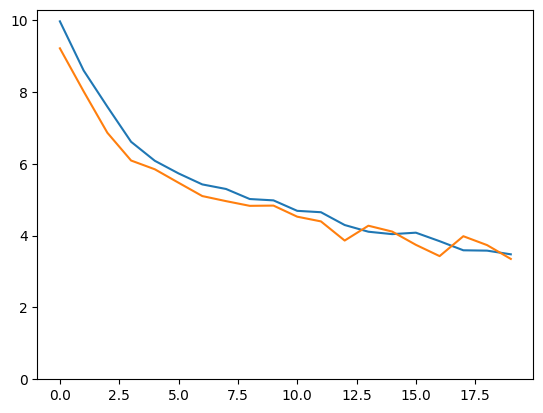

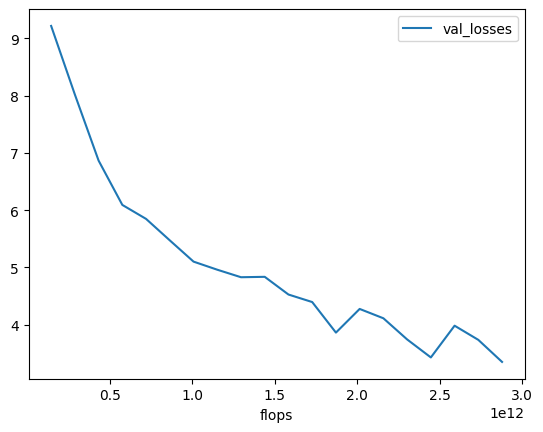

In [21]:
import pandas as pd

df = pd.DataFrame(metrics_basic_Shakespeare)
df['train_losses'].plot(ylim = 0)
df['val_losses'].plot(ylim=0)
df.plot(x = 'flops', y='val_losses')

## Big Model

In [22]:
class BigModel(torch.nn.Module):
    def __init__(self, big=False):
        super(BigModel, self).__init__()
        self.embedding = torch.nn.Embedding(vocab_size, new_emb_size if big else emb_size)
        self.pe = PositionalEncoding(d_model= new_emb_size if big else emb_size)
        self.block1 = Block(big=big)
        self.block2 = Block(big=big)
        self.block3 = Block(big=big)
        self.block4 = Block(big=big)
        self.block5 = Block(big=big)
        self.block6 = Block(big=big)
        self.block7 = Block(big=big)
        self.block8 = Block(big=big)
        self.f_lin = torch.nn.Linear(new_emb_size if big else emb_size, vocab_size)
        self.drop = torch.nn.Dropout(0.1)
    def forward(self, inp):
        e = self.embedding(inp)
        e = self.pe(e)
        m = self.block1(e)
        m = self.block2(m)
        m = self.block3(m)
        m = self.block4(m)
        m = self.block5(m)
        m = self.block6(m)
        m = self.block7(m)
        m = self.block8(m)
        r = self.f_lin(self.drop(m))
        return r

## Fused transformer Architecture

In [23]:
k_params = torch.empty((0,emb_size*emb_size)).to(device)
q_params = torch.empty((0,emb_size*emb_size)).to(device)
v_params = torch.empty((0,emb_size*emb_size)).to(device)
lin_params = torch.empty((0, 2*emb_size*emb_size)).to(device)
ffn_w_params = torch.empty((0, emb_size*emb_size)).to(device)
ffn_b_params = torch.empty((0, emb_size)).to(device)
l_norm_w_params = torch.empty((0, emb_size)).to(device)
l_norm_b_params = torch.empty((0, emb_size)).to(device)
for i in model.state_dict():
    if '.k.' in i:
        k_params = torch.cat((k_params, model.state_dict()[i].flatten().view(1,-1)), dim=0)
    elif '.q.' in i:
        q_params = torch.cat((q_params, model.state_dict()[i].flatten().view(1,-1)), dim=0)
    elif '.v.' in i:
        v_params = torch.cat((v_params, model.state_dict()[i].flatten().view(1,-1)), dim=0)
    elif '.mh_lin' in i:
        lin_params = torch.cat((lin_params, model.state_dict()[i].flatten().view(1,-1)), dim = 0)
    elif 'ffn' in i and 'weight' in i:
        ffn_w_params = torch.cat((ffn_w_params, model.state_dict()[i].flatten().view(1,-1)), dim = 0)
    elif 'ffn' in i and 'bias' in i:
        ffn_b_params = torch.cat((ffn_b_params, model.state_dict()[i].flatten().view(1,-1)), dim = 0)
    elif 'l_norm' in i and 'weight' in i:
        l_norm_w_params = torch.cat((l_norm_w_params, model.state_dict()[i].flatten().view(1,-1)), dim = 0)
    elif 'l_norm' in i and 'bias' in i:
        l_norm_b_params = torch.cat((l_norm_b_params, model.state_dict()[i].flatten().view(1,-1)), dim = 0)


In [24]:
class FusedEmbedding(torch.nn.Module):
    def __init__(self, emb_params, static=True, width=False, width_static=True):
        super(FusedEmbedding, self).__init__()
        self.static = static
        self.width_static = width_static
        self.width=width
        if static:
            if width:
                if width_static:
                    self.emb_params = torch.cat((emb_params, emb_params)).view(vocab_size, -1)
                else:
                    self.emb_params = emb_params.view(vocab_size, -1)
                    self.width_w = torch.nn.Linear(emb_size, new_emb_size, bias=False)
            else:
                self.emb_params = emb_params.view(vocab_size, -1)
        else:
            self.width = width
            self.emb_params = emb_params
    def forward(self, inp):
        emb = self.emb_params
        if self.static:
            if self.width:
                if self.width_static:
                    return torch.nn.functional.embedding(inp, emb)
                return torch.nn.functional.embedding(inp, self.width_w(emb))
        emb = emb.view(vocab_size, -1)
        return torch.nn.functional.embedding(inp, emb)

In [25]:
class FusedLin(torch.nn.Module):
    def __init__(self, num_layers, in_dim, out_dim, small_params_w, small_params_b = None, static = False, width_static=True, width=False, old_in_dim = emb_size, old_out_dim = emb_size):
        super( FusedLin, self).__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.static = static
        self.width = width
        self.old_in_dim = old_in_dim
        self.old_out_dim = old_out_dim
        self.width_static = width_static
        self.final = True if out_dim == vocab_size else False
        if not self.final and static:
            if width:
                if width_static:
                    self.register_buffer('small_params_w', torch.kron(torch.eye(int(out_dim/old_out_dim), int(in_dim/old_in_dim)).to(device), small_params_w).view(out_dim, in_dim))
                    if small_params_b is not None:
                        if old_out_dim == out_dim:
                            self.register_buffer('small_params_b', small_params_b)
                        else:
                            self.register_buffer('small_params_b', torch.cat((small_params_b, small_params_b)))
                    else:
                        self.small_params_b = None
                else:
                    self.register_buffer('small_params_w', small_params_w)
                    self.width_wa = torch.nn.Linear(old_out_dim, out_dim, bias=False) if width else None
                    self.width_wb = torch.nn.Linear(old_in_dim, in_dim, bias=False) if width else None
                    if small_params_b is not None:
                        self.register_buffer('small_params_b', small_params_b)
                    else:
                        self.small_params_b = None
                    self.width_b = torch.nn.Linear(old_out_dim, out_dim, bias=False) if width and small_params_b is not None else None
            else:
                self.register_buffer('small_params_w', small_params_w.view(out_dim, in_dim))
                if small_params_b is not None:
                    self.register_buffer('small_params_b', small_params_b)
                else:
                    self.small_params_b = None
        else:
            self.width_wa = torch.nn.Linear(old_out_dim, out_dim, bias=False) if width and not self.final else None
            self.width_wb = torch.nn.Linear(old_in_dim, in_dim, bias=False) if width else None
            self.width_b = torch.nn.Linear(old_out_dim, out_dim, bias=False) if width and small_params_b is not None and not self.final else None
            if not self.final:
                self.lin_w = torch.nn.Parameter(torch.rand(num_layers))
                if small_params_b is not None:
                    self.lin_b = torch.nn.Parameter(torch.rand(num_layers))
            self.register_buffer('small_params_w', small_params_w)
            if small_params_b is not None:
                self.register_buffer('small_params_b', small_params_b)
            else:
                self.small_params_b = None
    def forward(self, inp):
        if self.static and not self.final:
            weight=self.small_params_w
            bias=self.small_params_b
            if not self.width_static:
                weight = self.width_wb(weight.view(self.old_out_dim, self.old_in_dim))
                weight = self.width_wa(weight.T).T
                if bias is not None:
                    bias = self.width_b(bias)
            return torch.nn.functional.linear(inp, weight=weight, bias=bias)
        if self.final:
            weight = self.small_params_w
            bias = self.small_params_b
        else:
            weight = self.small_params_w.T @ self.lin_w
            bias = None
            if self.small_params_b is not None:
                bias = self.small_params_b.T@self.lin_b
        if self.width:
            if not self.final:
                weight = self.width_wb(weight.view(self.old_out_dim, self.old_in_dim))
                weight = self.width_wa(weight.T).T
            else:
                weight = self.width_wb(weight.view(self.old_out_dim, self.old_in_dim))
        if self.width_b is not None:
            bias = self.width_b(bias)
        weight = weight.view(self.out_dim, self.in_dim)
        return torch.nn.functional.linear(inp, weight, bias = bias)

In [26]:
class FusedNorm(torch.nn.Module):
    def __init__(self, num_layers, small_params_w, small_params_b, static=False, width_static = True, width=False):
        super(FusedNorm, self).__init__()
        self.static = static
        self.width = width
        self.width_static = width_static
        if not static:
            self.register_buffer('small_params_w', small_params_w)
            self.register_buffer('small_params_b', small_params_b)
            self.lin_w = torch.nn.Parameter(torch.randn(num_layers))
            self.lin_b = torch.nn.Parameter(torch.randn(num_layers))
            if width:
                self.width_w = torch.nn.Linear(emb_size, new_emb_size, bias=False)
                self.width_b = torch.nn.Linear(emb_size, new_emb_size, bias=False)
        else:
            if width:
                if width_static:
                    self.register_buffer('small_params_w', torch.cat((small_params_w, small_params_w)))
                    self.register_buffer('small_params_b', torch.cat((small_params_b, small_params_b)))
                else:
                    self.register_buffer('small_params_w', small_params_w)
                    self.register_buffer('small_params_b', small_params_b)
                    self.width_w = torch.nn.Linear(emb_size, new_emb_size, bias=False)
                    self.width_b = torch.nn.Linear(emb_size, new_emb_size, bias=False)
            else:
                self.register_buffer('small_params_w', small_params_w)
                self.register_buffer('small_params_b', small_params_b)
    def forward(self, inp):
        if self.static:
            weight = self.small_params_w
            bias = self.small_params_b
            e_s = emb_size if not self.width else new_emb_size
            if not self.width_static:
                weight = self.width_w(weight)
                bias = self.width_b(bias)
            return torch.nn.functional.layer_norm(inp, tuple([e_s]), weight=weight, bias=bias)
        weight = self.small_params_w.T @ self.lin_w
        bias = self.small_params_b.T @ self.lin_b
        if self.width:
            weight = self.width_w(weight)
            bias = self.width_b(bias)
        e_s = emb_size if not self.width else new_emb_size
        return torch.nn.functional.layer_norm(inp, tuple([e_s]), weight=weight, bias=bias)


In [27]:
class FusedAttentionHead(torch.nn.Module):
    def __init__(self, static=False, layerNum=None, width=False, width_static = True):
        super( FusedAttentionHead, self).__init__()
        self.static = static
        self.width_static = width_static
        if not static:
            self.k = FusedLin(num_small_layers*multi_heads, emb_size if not width else new_emb_size, emb_size if not width else new_emb_size, k_params, width=width, width_static=width_static)
            self.q = FusedLin(num_small_layers*multi_heads, emb_size if not width else new_emb_size, emb_size if not width else new_emb_size, q_params, width=width, width_static=width_static)
            self.v = FusedLin(num_small_layers*multi_heads, emb_size if not width else new_emb_size, emb_size if not width else new_emb_size, v_params, width=width, width_static=width_static)
        else:
            self.k = FusedLin(num_small_layers*multi_heads, emb_size if not width else new_emb_size, emb_size if not width else new_emb_size, k_params[layerNum], static=True, width=width, width_static=width_static)
            self.q = FusedLin(num_small_layers*multi_heads, emb_size if not width else new_emb_size, emb_size if not width else new_emb_size, q_params[layerNum], static=True, width=width, width_static=width_static)
            self.v = FusedLin(num_small_layers*multi_heads, emb_size if not width else new_emb_size, emb_size if not width else new_emb_size, v_params[layerNum], static=True, width=width, width_static=width_static)
        self.register_buffer('tril', torch.tril(torch.ones(block_size,block_size)))
    def forward(self, e):
        keys = self.k(e)
        queries = self.q(e)
        values = self.v(e)
        ret = keys @ queries.transpose(1, 2)*(1.0/math.sqrt(keys.size(-1)))
        ret = torch.masked_fill(ret, self.tril==0, -torch.inf)
        ret = torch.softmax(ret, 2)
        ret = ret @ values
        return ret

In [28]:
class FusedMultiHead(torch.nn.Module):
    def __init__(self, static=False, layerNum=None, width=False, width_static = True):
        super( FusedMultiHead, self).__init__()
        self.drop = torch.nn.Dropout(0.1)
        self.width_static = width_static
        if not static:
            self.head1 = FusedAttentionHead(width=width, width_static=width_static)
            self.head2 = FusedAttentionHead(width=width, width_static=width_static)
            self.mh_lin = FusedLin(num_small_layers, multi_heads*(emb_size if not width else new_emb_size), emb_size if not width else new_emb_size, lin_params, width=width, old_in_dim=multi_heads*emb_size , old_out_dim=emb_size, width_static=width_static)
        else:
            self.head1 = FusedAttentionHead(static=True, layerNum=2*layerNum, width=width, width_static=width_static)
            self.head2 = FusedAttentionHead(static=True, layerNum=2*layerNum+1, width=width, width_static=width_static)
            self.mh_lin = FusedLin(num_small_layers, multi_heads*(emb_size if not width else new_emb_size), emb_size if not width else new_emb_size, lin_params[layerNum], static=True, width=width, width_static=width_static, old_in_dim=multi_heads*emb_size, old_out_dim=emb_size)
    def forward(self, inp):
        x1 = self.head1(inp)
        x2 = self.head2(inp)
        return self.mh_lin(self.drop(torch.cat([x1,x2], dim=2))).relu()

In [29]:
class FusedBlock(torch.nn.Module):
    def __init__(self, static=False, layerNum=None, width=False, width_static = True):
        super(FusedBlock, self).__init__()
        self.static = static
        self.width_static = width_static
        self.drop = torch.nn.Dropout(0.1)
        if not static:
            self.multiHead = FusedMultiHead(width=width, width_static=width_static)
            self.norm_1 = FusedNorm(num_small_layers*2, l_norm_w_params, l_norm_b_params, width=width, width_static=width_static)
            self.norm_2 = FusedNorm(num_small_layers*2, l_norm_w_params, l_norm_b_params, width=width, width_static=width_static)
            self.ffn = FusedLin(num_small_layers, emb_size if not width else new_emb_size, emb_size if not width else new_emb_size, ffn_w_params, ffn_b_params, width=width, width_static=width_static)
        else:
            self.multiHead = FusedMultiHead(static=True, layerNum=layerNum, width=width, width_static=width_static)
            self.norm_1 = FusedNorm(num_small_layers*2, l_norm_w_params[layerNum*2], l_norm_b_params[layerNum*2], static=True, width=width, width_static=width_static)
            self.norm_2 = FusedNorm(num_small_layers*2, l_norm_w_params[layerNum*2+1], l_norm_b_params[layerNum*2+1], static=True, width=width, width_static=width_static)
            self.ffn = FusedLin(num_small_layers, emb_size if not width else new_emb_size, emb_size if not width else new_emb_size, ffn_w_params[layerNum], ffn_b_params[layerNum], static=True, width=width, width_static=width_static)
    def forward(self, inp):
        m = self.norm_1(inp + self.multiHead(inp))
        m = self.norm_2(m + self.ffn(self.drop(m)).relu())
        return m


## LiGO & CrossLiGO

In [30]:
class StackLiGO(torch.nn.Module):
    def __init__(self, width=False) -> None:
        super(StackLiGO, self).__init__()
        self.emb = FusedEmbedding(emb_params=model.embedding.weight.flatten().clone(), width=width, static=True)
        self.pe = PositionalEncoding(d_model=new_emb_size if width else emb_size)
        self.block1 = FusedBlock(static=True, layerNum=0, width=width)
        self.block2 = FusedBlock(static=True, layerNum=1, width=width)
        self.block3 = FusedBlock(static=True, layerNum=2, width=width)
        self.block4 = FusedBlock(static=True, layerNum=3, width=width)
        self.block5 = FusedBlock(width=width)
        self.block6 = FusedBlock(width=width)
        self.block7 = FusedBlock(width=width)
        self.block8 = FusedBlock(width=width)
        self.drop = torch.nn.Dropout(0.1)
        self.f_lin = FusedLin(1, in_dim=emb_size if not width else new_emb_size, out_dim=vocab_size, static=True, small_params_w= model.f_lin.weight.flatten().clone(), small_params_b=model.f_lin.bias.clone(), width=width, old_in_dim=emb_size, old_out_dim=vocab_size)
    def forward(self, inp):
        e = self.emb(inp)
        e = self.pe(e)
        m = self.block1(e)
        m = self.block2(m)
        m = self.block3(m)
        m = self.block4(m)
        m = self.block5(m)
        m = self.block6(m)
        m = self.block7(m)
        m = self.block8(m)
        return self.f_lin(self.drop(m))

In [31]:
class StackLiGOv2(torch.nn.Module):
    def __init__(self, width=False) -> None:
        super(StackLiGOv2, self).__init__()
        self.emb = FusedEmbedding(emb_params=model.embedding.weight.flatten().clone(), width=width, static=True, width_static=False)
        self.pe = PositionalEncoding(d_model=new_emb_size if width else emb_size)
        self.block1 = FusedBlock(static=True, layerNum=0, width=width, width_static=False)
        self.block2 = FusedBlock(static=True, layerNum=1, width=width, width_static=False)
        self.block3 = FusedBlock(static=True, layerNum=2, width=width, width_static=False)
        self.block4 = FusedBlock(static=True, layerNum=3, width=width, width_static=False)
        self.block5 = FusedBlock(width=width)
        self.block6 = FusedBlock(width=width)
        self.block7 = FusedBlock(width=width)
        self.block8 = FusedBlock(width=width)
        self.drop = torch.nn.Dropout(0.1)
        self.f_lin = FusedLin(1, in_dim=emb_size if not width else new_emb_size, out_dim=vocab_size, static=True, small_params_w= model.f_lin.weight.flatten().clone(), small_params_b=model.f_lin.bias.clone(), width=width, old_in_dim=emb_size, old_out_dim=vocab_size)
    def forward(self, inp):
        e = self.emb(inp)
        e = self.pe(e)
        m = self.block1(e)
        m = self.block2(m)
        m = self.block3(m)
        m = self.block4(m)
        m = self.block5(m)
        m = self.block6(m)
        m = self.block7(m)
        m = self.block8(m)
        return self.f_lin(self.drop(m))

In [32]:
class LiGO(torch.nn.Module):
    def __init__(self, width=False) -> None:
        super(LiGO, self).__init__()
        self.emb = FusedEmbedding(emb_params=model.embedding.weight.flatten().clone(), width=width, static=True, width_static=False)
        self.pe = PositionalEncoding(d_model=new_emb_size if width else emb_size)
        self.block1 = FusedBlock(width=width, width_static=False)
        self.block2 = FusedBlock(width=width, width_static=False)
        self.block3 = FusedBlock(width=width, width_static=False)
        self.block4 = FusedBlock(width=width, width_static=False)
        self.block5 = FusedBlock(width=width, width_static=False)
        self.block6 = FusedBlock(width=width, width_static=False)
        self.block7 = FusedBlock(width=width, width_static=False)
        self.block8 = FusedBlock(width=width, width_static=False)
        self.drop = torch.nn.Dropout(0.1)
        self.f_lin = FusedLin(1, in_dim=emb_size if not width else new_emb_size, out_dim=vocab_size, static=True, small_params_w= model.f_lin.weight.flatten().clone(), small_params_b=model.f_lin.bias.clone(), width=width, old_in_dim=emb_size, old_out_dim=vocab_size)
    def forward(self, inp):
        e = self.emb(inp)
        e = self.pe(e)
        m = self.block1(e)
        m = self.block2(m)
        m = self.block3(m)
        m = self.block4(m)
        m = self.block5(m)
        m = self.block6(m)
        m = self.block7(m)
        m = self.block8(m)
        return self.f_lin(self.drop(m))

In [33]:
class CrossLiGO(torch.nn.Module):
    def __init__(self, width=False) -> None:
        super(CrossLiGO, self).__init__()
        self.emb = FusedEmbedding(emb_params=model.embedding.weight.flatten().detach().clone(), width=width, static=True, width_static=False)
        self.pe = PositionalEncoding(d_model=new_emb_size if width else emb_size)
        self.block1 = FusedBlock(static=True, layerNum=0, width=width)
        self.block3 = FusedBlock(static=True, layerNum=1, width=width)
        self.block5 = FusedBlock(static=True, layerNum=2, width=width)
        self.block7 = FusedBlock(static=True, layerNum=3, width=width)
        self.block2 = FusedBlock(width=width, width_static=False)
        self.block4 = FusedBlock(width=width, width_static=False)
        self.block6 = FusedBlock(width=width, width_static=False)
        self.block8 = FusedBlock(width=width, width_static=False)
        self.drop = torch.nn.Dropout(0.1)
        self.f_lin = FusedLin(1, in_dim=emb_size if not width else new_emb_size, out_dim=vocab_size, static=True, small_params_w= model.f_lin.weight.flatten().clone().to(device), small_params_b=model.f_lin.bias.detach().clone().to(device), width=width, old_in_dim=emb_size, old_out_dim=vocab_size)
    def forward(self, inp):
        e = self.emb(inp)
        e = self.pe(e)
        m = self.block1(e)
        m = self.block2(m)
        m = self.block3(m)
        m = self.block4(m)
        m = self.block5(m)
        m = self.block6(m)
        m = self.block7(m)
        m = self.block8(m)
        return self.f_lin(self.drop(m))


In [34]:
class LiGO_W(torch.nn.Module):
    def __init__(self, width=True) -> None:
        super(LiGO_W, self).__init__()
        self.emb = FusedEmbedding(emb_params=model.embedding.weight.flatten(), width=width, static=True, width_static=False)
        self.pe = PositionalEncoding(d_model=new_emb_size if width else emb_size)
        self.block1 = FusedBlock(width=width, static=True, layerNum=0, width_static=False)
        self.block2 = FusedBlock(width=width, static=True, layerNum=1, width_static=False)
        self.block3 = FusedBlock(width=width, static=True, layerNum=2, width_static=False)
        self.block4 = FusedBlock(width=width, static=True, layerNum=3, width_static=False)
        self.drop = torch.nn.Dropout(0.1)
        self.f_lin = FusedLin(1, in_dim=emb_size if not width else new_emb_size, out_dim=vocab_size, static=True, small_params_w= model.f_lin.weight.flatten(), small_params_b=model.f_lin.bias, width=width, old_in_dim=emb_size, old_out_dim=vocab_size)
    def forward(self, inp):
        e = self.emb(inp)
        e = self.pe(e)
        m = self.block1(e)
        m = self.block2(m)
        m = self.block3(m)
        m = self.block4(m)
        return self.f_lin(self.drop(m))


In [35]:
@torch.no_grad()
def initLiGO(stackLiGO, bigModel):
    # Embedding layer
    emb = stackLiGO.emb.emb_params
    if stackLiGO.emb.width and not stackLiGO.emb.width_static:
        emb = stackLiGO.emb.width_w(emb)
    setattr(bigModel.embedding, 'weight', torch.nn.Parameter(emb, requires_grad=True).to(device))
    # Final Linear layer
    f_lin_w = stackLiGO.f_lin.small_params_w.view(vocab_size, -1)
    f_lin_b = stackLiGO.f_lin.small_params_b
    if stackLiGO.f_lin.width:
        f_lin_w = (stackLiGO.f_lin.width_wb(f_lin_w))
        # f_lin_w = (stackLiGO.f_lin.width_wa(f_lin_w.T)).T     Issues with big vocab size
        # f_lin_b = stackLiGO.f_lin.width_b.weight@f_lin_b
    setattr(bigModel.f_lin, 'weight', torch.nn.Parameter(f_lin_w.view(vocab_size, -1), requires_grad=True).to(device))
    setattr(bigModel.f_lin, 'bias', torch.nn.Parameter(f_lin_b, requires_grad=True).to(device))
    num_layers = num_large_layers if type(stackLiGO) is not LiGO_W else num_small_layers
    for i in range(1, num_layers+1):
        fused_block = getattr(stackLiGO, f'block{i}')
        big_block = getattr(bigModel, f'block{i}')
        # Setting FFN Weights
        if fused_block.ffn.static:
            if fused_block.ffn.width:
                if fused_block.ffn.width_static:
                    fb_w = fused_block.ffn.small_params_w.view(new_emb_size, new_emb_size)
                    fb_b = fused_block.ffn.small_params_b
                else:
                    fb_w = fused_block.ffn.small_params_w.view(emb_size, emb_size)
                    fb_b = fused_block.ffn.small_params_b
                    fb_w = fused_block.ffn.width_wb(fb_w)
                    fb_w = fused_block.ffn.width_wa(fb_w.T).T
                    fb_b = fused_block.ffn.width_b.weight@fb_b
            else:
                fb_w = fused_block.ffn.small_params_w.view(emb_size, emb_size)
                fb_b = fused_block.ffn.small_params_b
        else:
            fb_w = (ffn_w_params.T@fused_block.ffn.lin_w).view(emb_size, emb_size)
            fb_b = (ffn_b_params.T@fused_block.ffn.lin_b)
            if fused_block.ffn.width:
                fb_w = fused_block.ffn.width_wb(fb_w)
                fb_w = fused_block.ffn.width_wa(fb_w.T).T
                fb_b = fused_block.ffn.width_b.weight@fb_b
        setattr(big_block.ffn, 'weight', torch.nn.Parameter(fb_w, requires_grad=True).to(device))
        setattr(big_block.ffn, 'bias', torch.nn.Parameter(fb_b, requires_grad=True).to(device))
        # Setting Norm Layers
        if fused_block.static:
            n_w_1 = fused_block.norm_1.small_params_w
            n_b_1 = fused_block.norm_1.small_params_b
            n_w_2 = fused_block.norm_2.small_params_w
            n_b_2 = fused_block.norm_2.small_params_b
            if not fused_block.width_static:
                n_w_1 = fused_block.norm_1.width_w.weight@n_w_1
                n_b_1 = fused_block.norm_1.width_b.weight@n_b_1
                n_w_2 = fused_block.norm_2.width_w.weight@n_w_2
                n_b_2 = fused_block.norm_2.width_b.weight@n_b_2
        else:
            n_w_1 = (l_norm_w_params.T@fused_block.norm_1.lin_w)
            n_b_1 = (l_norm_b_params.T@fused_block.norm_1.lin_b)
            n_w_2 = (l_norm_w_params.T@fused_block.norm_2.lin_w)
            n_b_2 = (l_norm_b_params.T@fused_block.norm_2.lin_b)
            if fused_block.norm_1.width:
                n_w_1 = fused_block.norm_1.width_w.weight@n_w_1
                n_b_1 = fused_block.norm_1.width_b.weight@n_b_1
                n_w_2 = fused_block.norm_2.width_w.weight@n_w_2
                n_b_2 = fused_block.norm_2.width_b.weight@n_b_2
        setattr(big_block.l_norm_1, 'weight', torch.nn.Parameter(n_w_1, requires_grad=True).to(device))
        setattr(big_block.l_norm_1, 'bias', torch.nn.Parameter(n_b_1, requires_grad=True).to(device))
        setattr(big_block.l_norm_2, 'weight', torch.nn.Parameter(n_w_2, requires_grad=True).to(device))
        setattr(big_block.l_norm_2, 'bias', torch.nn.Parameter(n_b_2, requires_grad=True).to(device))
        # Setting Multi-Head Attention
        if fused_block.static:
            mh = fused_block.multiHead.mh_lin.small_params_w
            if not fused_block.width_static:
                mh = fused_block.multiHead.mh_lin.width_wb(mh.view(emb_size, multi_heads*emb_size))
                mh = fused_block.multiHead.mh_lin.width_wa(mh.T).T
        else:
            mh = (lin_params.T@fused_block.multiHead.mh_lin.lin_w).view(emb_size, emb_size*multi_heads)
            if fused_block.multiHead.mh_lin.width:
                mh = fused_block.multiHead.mh_lin.width_wb(mh)
                mh = fused_block.multiHead.mh_lin.width_wa(mh.T).T
        setattr(big_block.multihead.mh_lin, 'weight', torch.nn.Parameter(mh, requires_grad=True))
        for h in range(1, multi_heads+1):
            head = getattr(big_block.multihead, f'head{h}')
            fused_head = getattr(fused_block.multiHead, f'head{h}')
            if fused_head.static:
                k = fused_head.k.small_params_w
                q = fused_head.q.small_params_w
                v = fused_head.v.small_params_w
                if not fused_block.width_static:
                    k = fused_head.k.width_wb(k.view(emb_size, emb_size))
                    k = fused_head.k.width_wa(k.T).T
                    q = fused_head.q.width_wb(q.view(emb_size, emb_size))
                    q = fused_head.q.width_wa(q.T).T
                    v = fused_head.v.width_wb(v.view(emb_size, emb_size))
                    v = fused_head.v.width_wa(v.T).T
            else:
                k = (k_params.T@fused_head.k.lin_w).view(emb_size, emb_size)
                q = (q_params.T@fused_head.q.lin_w).view(emb_size, emb_size)
                v = (v_params.T@fused_head.v.lin_w).view(emb_size, emb_size)
                if fused_head.k.width:
                    k = fused_head.k.width_wb(k)
                    k = fused_head.k.width_wa(k.T).T
                    q = fused_head.q.width_wb(q)
                    q = fused_head.q.width_wa(q.T).T
                    v = fused_head.v.width_wb(v)
                    v = fused_head.v.width_wa(v.T).T
            setattr(head.k, 'weight', torch.nn.Parameter(k, requires_grad=True).to(device))
            setattr(head.q, 'weight', torch.nn.Parameter(q, requires_grad=True).to(device))
            setattr(head.v, 'weight', torch.nn.Parameter(v, requires_grad=True).to(device))

## Comparative study models

### Scratch

In [36]:
bigModel_scratch = BigModel(big=True).to(device)
optim_sb = torch.optim.Adam(params=bigModel_scratch.parameters(), lr=1e-3)
scratch_depth_width = train(bigModel_scratch, optim_sb, 20)

Epoch 1, Train Loss: 8.8955, Val Loss: 7.4699
Epoch 2, Train Loss: 6.6406, Val Loss: 6.0516
Epoch 3, Train Loss: 5.7705, Val Loss: 5.3795
Epoch 4, Train Loss: 5.1384, Val Loss: 4.8030
Epoch 5, Train Loss: 4.8183, Val Loss: 4.7095
Epoch 6, Train Loss: 4.5183, Val Loss: 4.1313
Epoch 7, Train Loss: 4.2990, Val Loss: 3.9821
Epoch 8, Train Loss: 3.9797, Val Loss: 3.8161
Epoch 9, Train Loss: 3.8430, Val Loss: 3.8203
Epoch 10, Train Loss: 3.5928, Val Loss: 4.0754
Epoch 11, Train Loss: 3.4670, Val Loss: 3.3024
Epoch 12, Train Loss: 3.2814, Val Loss: 3.2186
Epoch 13, Train Loss: 3.3234, Val Loss: 3.2328
Epoch 14, Train Loss: 2.9561, Val Loss: 3.1185
Epoch 15, Train Loss: 3.0746, Val Loss: 2.8405
Epoch 16, Train Loss: 2.8193, Val Loss: 2.8564
Epoch 17, Train Loss: 2.5711, Val Loss: 2.9524
Epoch 18, Train Loss: 2.7392, Val Loss: 2.5136
Epoch 19, Train Loss: 2.6241, Val Loss: 2.4228
Epoch 20, Train Loss: 2.2476, Val Loss: 2.8716


<Axes: >

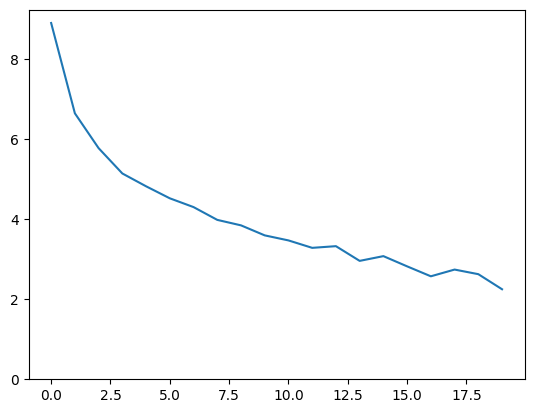

In [37]:
big_model_metrics = pd.DataFrame(scratch_depth_width)
big_model_metrics['train_losses'].plot(ylim = 0)

## Stacking

In [38]:
import torch.nn as nn

class StackedModel(nn.Module):
    def __init__(self, pretrained_model):
        super(StackedModel, self).__init__()

        # Use pretrained model's components
        self.embedding = pretrained_model.embedding
        self.pe = pretrained_model.pe
        self.f_lin = pretrained_model.f_lin
        self.drop = pretrained_model.drop

        # Add pretrained blocks (1-4)
        self.blocks = nn.ModuleList(pretrained_model.blocks)

        # Add additional blocks according to the pattern: 5-1, 6-2, 7-3, 8-4
        # Block 5 -> Block 1, Block 6 -> Block 2, Block 7 -> Block 3, Block 8 -> Block 4
        self.blocks.append(pretrained_model.blocks[0])  # Block 5
        self.blocks.append(pretrained_model.blocks[1])  # Block 6
        self.blocks.append(pretrained_model.blocks[2])  # Block 7
        self.blocks.append(pretrained_model.blocks[3])  # Block 8

    def forward(self, inp):
        e = self.embedding(inp)
        e = self.pe(e)

        # Pass input through all blocks sequentially
        for block in self.blocks:
            e = block(e)

        r = self.f_lin(self.drop(e))
        return r

In [39]:
stacked_model = StackedModel(model)
optim_stacked = torch.optim.Adam(params=stacked_model.parameters(), lr=1e-2)
stacked_metrics = train(stacked_model, optim_stacked, 20)

Epoch 1, Train Loss: 8.8217, Val Loss: 8.9912
Epoch 2, Train Loss: 8.6447, Val Loss: 8.4168
Epoch 3, Train Loss: 8.2798, Val Loss: 8.3595
Epoch 4, Train Loss: 8.1131, Val Loss: 7.9264
Epoch 5, Train Loss: 8.1091, Val Loss: 7.9727
Epoch 6, Train Loss: 7.9736, Val Loss: 8.0694
Epoch 7, Train Loss: 7.9809, Val Loss: 7.8296
Epoch 8, Train Loss: 7.9221, Val Loss: 7.6506
Epoch 9, Train Loss: 7.8086, Val Loss: 7.8207
Epoch 10, Train Loss: 7.7991, Val Loss: 7.9796
Epoch 11, Train Loss: 7.6381, Val Loss: 7.5240
Epoch 12, Train Loss: 7.6413, Val Loss: 7.8838
Epoch 13, Train Loss: 7.7381, Val Loss: 7.6000
Epoch 14, Train Loss: 7.7939, Val Loss: 7.5304
Epoch 15, Train Loss: 7.7713, Val Loss: 7.4881
Epoch 16, Train Loss: 7.7923, Val Loss: 7.8094
Epoch 17, Train Loss: 7.6384, Val Loss: 7.7066
Epoch 18, Train Loss: 7.7218, Val Loss: 7.7777
Epoch 19, Train Loss: 7.7465, Val Loss: 7.6671
Epoch 20, Train Loss: 7.6934, Val Loss: 7.6380


### LiGO Depth only

In [40]:
LiGO_d = LiGO(width=False).to(device)
optim_ld = torch.optim.Adam(params=LiGO_d.parameters(), lr=1e-2)
_=train(LiGO_d, optim_ld, 20)

Epoch 1, Train Loss: 8.2937, Val Loss: 6.9376
Epoch 2, Train Loss: 6.5923, Val Loss: 6.0225
Epoch 3, Train Loss: 5.9611, Val Loss: 5.3994
Epoch 4, Train Loss: 5.2720, Val Loss: 5.3445
Epoch 5, Train Loss: 4.9965, Val Loss: 4.7051
Epoch 6, Train Loss: 4.8498, Val Loss: 4.4770
Epoch 7, Train Loss: 4.7378, Val Loss: 4.4904
Epoch 8, Train Loss: 4.5112, Val Loss: 4.7019
Epoch 9, Train Loss: 4.7376, Val Loss: 4.3394
Epoch 10, Train Loss: 4.6535, Val Loss: 4.7286
Epoch 11, Train Loss: 4.6379, Val Loss: 4.5294
Epoch 12, Train Loss: 4.6430, Val Loss: 4.5134
Epoch 13, Train Loss: 4.5841, Val Loss: 4.3591
Epoch 14, Train Loss: 4.5096, Val Loss: 4.5425
Epoch 15, Train Loss: 4.5423, Val Loss: 4.3052
Epoch 16, Train Loss: 4.6485, Val Loss: 4.6331
Epoch 17, Train Loss: 4.4978, Val Loss: 4.4235
Epoch 18, Train Loss: 4.5173, Val Loss: 4.4763
Epoch 19, Train Loss: 4.2917, Val Loss: 4.3740
Epoch 20, Train Loss: 4.5375, Val Loss: 4.1137


In [41]:
bigModel = BigModel(big=False).to(device)
initLiGO(LiGO_d, bigModel)
optim_b = torch.optim.Adam(params=bigModel.parameters(), lr=1e-3)
ligo_depth_metrics = train(bigModel, optim_b, 20)

Epoch 1, Train Loss: 4.6794, Val Loss: 3.9670
Epoch 2, Train Loss: 4.0395, Val Loss: 3.7889
Epoch 3, Train Loss: 3.9168, Val Loss: 3.5740
Epoch 4, Train Loss: 3.6704, Val Loss: 3.6977
Epoch 5, Train Loss: 3.4934, Val Loss: 3.4716
Epoch 6, Train Loss: 3.5901, Val Loss: 3.3759
Epoch 7, Train Loss: 3.5723, Val Loss: 3.6368
Epoch 8, Train Loss: 3.4975, Val Loss: 3.4014
Epoch 9, Train Loss: 3.2695, Val Loss: 3.2093
Epoch 10, Train Loss: 3.0758, Val Loss: 2.7400
Epoch 11, Train Loss: 3.0966, Val Loss: 3.2510
Epoch 12, Train Loss: 2.8795, Val Loss: 2.7557
Epoch 13, Train Loss: 2.8463, Val Loss: 3.1711
Epoch 14, Train Loss: 2.9146, Val Loss: 3.2242
Epoch 15, Train Loss: 2.8392, Val Loss: 2.5775
Epoch 16, Train Loss: 2.8827, Val Loss: 2.5788
Epoch 17, Train Loss: 2.7713, Val Loss: 2.4920
Epoch 18, Train Loss: 2.6778, Val Loss: 2.2184
Epoch 19, Train Loss: 2.6469, Val Loss: 2.5195
Epoch 20, Train Loss: 2.6167, Val Loss: 2.6520


### CrossLiGO depth only

In [42]:
cl_d = CrossLiGO(width=False).to(device)
optim_ldw = torch.optim.Adam(cl_d.parameters(), lr=1e-2)
_=train(cl_d, optim_ldw, 20)

Epoch 1, Train Loss: 5.8780, Val Loss: 5.8372
Epoch 2, Train Loss: 5.8922, Val Loss: 5.4623
Epoch 3, Train Loss: 5.5705, Val Loss: 5.0528
Epoch 4, Train Loss: 5.2798, Val Loss: 5.1504
Epoch 5, Train Loss: 5.1763, Val Loss: 5.2183
Epoch 6, Train Loss: 5.0608, Val Loss: 5.1198
Epoch 7, Train Loss: 4.9548, Val Loss: 5.0031
Epoch 8, Train Loss: 4.9766, Val Loss: 4.9339
Epoch 9, Train Loss: 4.8130, Val Loss: 5.1299
Epoch 10, Train Loss: 4.8360, Val Loss: 5.0114
Epoch 11, Train Loss: 4.7169, Val Loss: 4.8491
Epoch 12, Train Loss: 4.8048, Val Loss: 4.6878
Epoch 13, Train Loss: 4.7832, Val Loss: 4.7838
Epoch 14, Train Loss: 4.9804, Val Loss: 4.8733
Epoch 15, Train Loss: 4.6866, Val Loss: 4.5178
Epoch 16, Train Loss: 4.9000, Val Loss: 4.5068
Epoch 17, Train Loss: 4.8930, Val Loss: 4.5242
Epoch 18, Train Loss: 4.7332, Val Loss: 4.6799
Epoch 19, Train Loss: 4.7366, Val Loss: 4.5851
Epoch 20, Train Loss: 4.7331, Val Loss: 4.4444


In [43]:
bigModel = BigModel(big=False).to(device)
initLiGO(cl_d, bigModel)
optim_b = torch.optim.Adam(params=bigModel.parameters(), lr=1e-3)
cl_depth_metrics = train(bigModel, optim_b, 20)

Epoch 1, Train Loss: 4.6623, Val Loss: 3.8386
Epoch 2, Train Loss: 4.2780, Val Loss: 3.8240
Epoch 3, Train Loss: 3.9616, Val Loss: 3.9527
Epoch 4, Train Loss: 3.8921, Val Loss: 3.5520
Epoch 5, Train Loss: 3.6251, Val Loss: 3.5534
Epoch 6, Train Loss: 3.7035, Val Loss: 3.5100
Epoch 7, Train Loss: 3.5874, Val Loss: 3.4131
Epoch 8, Train Loss: 3.4778, Val Loss: 3.4239
Epoch 9, Train Loss: 3.2868, Val Loss: 3.0958
Epoch 10, Train Loss: 3.3453, Val Loss: 2.9265
Epoch 11, Train Loss: 3.2571, Val Loss: 3.2687
Epoch 12, Train Loss: 3.1222, Val Loss: 2.9465
Epoch 13, Train Loss: 3.0490, Val Loss: 2.8729
Epoch 14, Train Loss: 3.0627, Val Loss: 3.0630
Epoch 15, Train Loss: 2.9094, Val Loss: 2.8061
Epoch 16, Train Loss: 2.9230, Val Loss: 2.7949
Epoch 17, Train Loss: 2.8016, Val Loss: 2.7486
Epoch 18, Train Loss: 2.6784, Val Loss: 2.5711
Epoch 19, Train Loss: 2.8354, Val Loss: 2.7829
Epoch 20, Train Loss: 2.5042, Val Loss: 2.4740


### StackLiGO depth only

In [44]:
stackLiGOd = StackLiGO(width=False).to(device)
optim_sld = torch.optim.Adam(params=stackLiGOd.parameters(), lr=1e-2)
_=train(stackLiGOd, optim_sld, 20)

Epoch 1, Train Loss: 31.0660, Val Loss: 25.1913
Epoch 2, Train Loss: 15.9393, Val Loss: 10.4145
Epoch 3, Train Loss: 9.9924, Val Loss: 8.1751
Epoch 4, Train Loss: 7.6841, Val Loss: 6.7772
Epoch 5, Train Loss: 6.4908, Val Loss: 6.1632
Epoch 6, Train Loss: 6.0175, Val Loss: 6.0116
Epoch 7, Train Loss: 5.7937, Val Loss: 5.6420
Epoch 8, Train Loss: 5.7199, Val Loss: 5.4463
Epoch 9, Train Loss: 5.2479, Val Loss: 5.5434
Epoch 10, Train Loss: 5.2698, Val Loss: 5.0787
Epoch 11, Train Loss: 4.9625, Val Loss: 5.4203
Epoch 12, Train Loss: 4.8966, Val Loss: 5.0143
Epoch 13, Train Loss: 4.7502, Val Loss: 4.7080
Epoch 14, Train Loss: 4.5672, Val Loss: 4.8728
Epoch 15, Train Loss: 4.5951, Val Loss: 4.2797
Epoch 16, Train Loss: 4.6156, Val Loss: 4.4072
Epoch 17, Train Loss: 4.5725, Val Loss: 4.3700
Epoch 18, Train Loss: 4.4280, Val Loss: 4.1947
Epoch 19, Train Loss: 4.4348, Val Loss: 4.2565
Epoch 20, Train Loss: 4.3275, Val Loss: 4.2575


In [45]:
bigModel = BigModel(big=False).to(device)
initLiGO(stackLiGOd, bigModel)
optim_b = torch.optim.Adam(params=bigModel.parameters(), lr=1e-3)
sl_depth_metrics = train(bigModel, optim_b, 20)

Epoch 1, Train Loss: 4.3524, Val Loss: 3.8232
Epoch 2, Train Loss: 4.0043, Val Loss: 3.5745
Epoch 3, Train Loss: 3.8126, Val Loss: 3.5448
Epoch 4, Train Loss: 3.5497, Val Loss: 3.5090
Epoch 5, Train Loss: 3.6361, Val Loss: 3.7867
Epoch 6, Train Loss: 3.4268, Val Loss: 3.3544
Epoch 7, Train Loss: 3.3044, Val Loss: 3.2351
Epoch 8, Train Loss: 3.3572, Val Loss: 3.2761
Epoch 9, Train Loss: 3.2802, Val Loss: 3.1726
Epoch 10, Train Loss: 3.1844, Val Loss: 2.9702
Epoch 11, Train Loss: 3.1397, Val Loss: 2.9948
Epoch 12, Train Loss: 3.0002, Val Loss: 3.0520
Epoch 13, Train Loss: 3.0349, Val Loss: 2.9234
Epoch 14, Train Loss: 3.0006, Val Loss: 2.7220
Epoch 15, Train Loss: 2.7639, Val Loss: 3.0300
Epoch 16, Train Loss: 2.7514, Val Loss: 2.6639
Epoch 17, Train Loss: 2.8558, Val Loss: 2.4184
Epoch 18, Train Loss: 2.7144, Val Loss: 2.2111
Epoch 19, Train Loss: 2.5175, Val Loss: 2.3741
Epoch 20, Train Loss: 2.5705, Val Loss: 2.2617


# When to grow

## Periodic

0 -> 8

pretrained(4) -> 8

In [48]:
base_model = model.to(device)
periodic_optimizer = torch.optim.Adam(base_model.parameters(), lr = 1e-3)
metrics_pretrained_periodic = periodic_train(base_model, periodic_optimizer, 20, num_blocks=4)

Epoch 1, Train Loss: 7.5038, Val Loss: 7.3319
Epoch 2, Train Loss: 7.4484, Val Loss: 7.4153
Epoch 3, Train Loss: 7.5116, Val Loss: 7.1791
Epoch 4, Train Loss: 7.2854, Val Loss: 7.0721
Adding new block at epoch 4
added successfully
Epoch 5, Train Loss: 10.9532, Val Loss: 8.4724
Epoch 6, Train Loss: 8.3448, Val Loss: 7.9557
Epoch 7, Train Loss: 7.8004, Val Loss: 7.7470
Epoch 8, Train Loss: 7.6671, Val Loss: 7.6016
Adding new block at epoch 8
added successfully
Epoch 9, Train Loss: 8.1876, Val Loss: 7.4515
Epoch 10, Train Loss: 7.6540, Val Loss: 7.6597
Epoch 11, Train Loss: 7.7107, Val Loss: 7.4943
Epoch 12, Train Loss: 7.7643, Val Loss: 7.6489
Adding new block at epoch 12
added successfully
Epoch 13, Train Loss: 8.3657, Val Loss: 7.8609
Epoch 14, Train Loss: 7.8294, Val Loss: 7.5570
Epoch 15, Train Loss: 7.6501, Val Loss: 7.7055
Epoch 16, Train Loss: 7.6771, Val Loss: 7.5528
Adding new block at epoch 16
added successfully
Epoch 17, Train Loss: 7.7582, Val Loss: 7.5592
Epoch 18, Train Los

<Axes: >

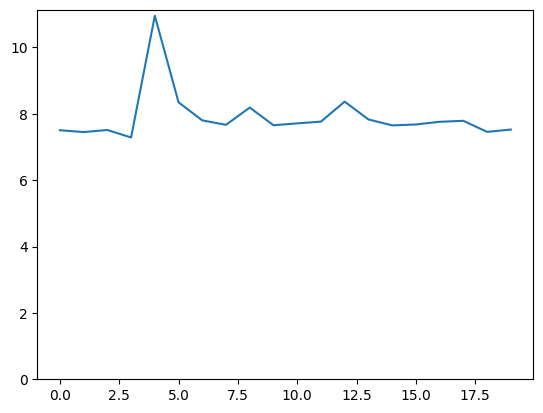

In [49]:
import pandas as pd

df = pd.DataFrame(metrics_pretrained_periodic)
df['train_losses'].plot(ylim = 0)

In [50]:
base_model = Model(1)
periodic_optimizer = torch.optim.Adam(base_model.parameters(), lr = 1e-3)
metrics_basic_periodic = periodic_train(base_model, periodic_optimizer, 20, num_blocks = 8)

Epoch 1, Train Loss: 10.4495, Val Loss: 9.7886
Epoch 2, Train Loss: 9.2897, Val Loss: 8.5484
Adding new block at epoch 2
added successfully
Epoch 3, Train Loss: 8.1241, Val Loss: 7.5636
Epoch 4, Train Loss: 7.3111, Val Loss: 6.9514
Adding new block at epoch 4
added successfully
Epoch 5, Train Loss: 6.6765, Val Loss: 6.3884
Epoch 6, Train Loss: 6.2845, Val Loss: 6.0487
Adding new block at epoch 6
added successfully
Epoch 7, Train Loss: 5.8575, Val Loss: 5.5342
Epoch 8, Train Loss: 5.3223, Val Loss: 5.4560
Adding new block at epoch 8
added successfully
Epoch 9, Train Loss: 5.3293, Val Loss: 5.2014
Epoch 10, Train Loss: 5.3040, Val Loss: 5.2278
Adding new block at epoch 10
added successfully
Epoch 11, Train Loss: 5.1073, Val Loss: 4.7303
Epoch 12, Train Loss: 4.6526, Val Loss: 4.6885
Adding new block at epoch 12
added successfully
Epoch 13, Train Loss: 4.7185, Val Loss: 4.5190
Epoch 14, Train Loss: 4.5633, Val Loss: 4.6374
Adding new block at epoch 14
added successfully
Epoch 15, Train Lo

<Axes: >

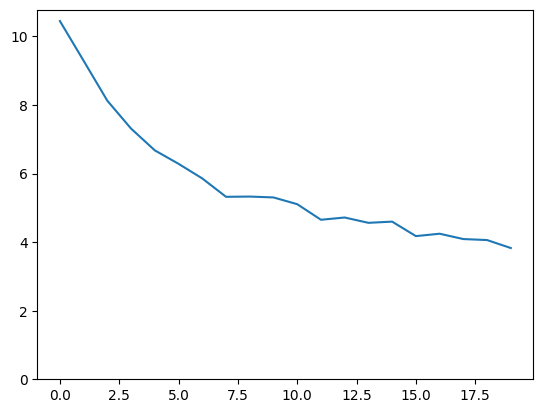

In [51]:
import pandas as pd

df = pd.DataFrame(metrics_basic_periodic)
df['train_losses'].plot(ylim = 0)

## Convergence Growth

In [60]:
base_model = Model(1).to(device)
convergence_optimizer = torch.optim.Adam(base_model.parameters(), lr = 1e-3)
metrics_basic_convergence = convergence_train(base_model, convergence_optimizer, 20, num_blocks = 8, patience=5, threshold=1e-3, moving_avg_window=5, stability_threshold=0.002)

Epoch 1, Train Loss: 10.3856, Val Loss: 9.7748
Epoch 2, Train Loss: 9.1494, Val Loss: 8.3649
Forcing block addition at epoch 2 due to period interval.
Added successfully
Epoch 3, Train Loss: 8.0995, Val Loss: 7.6130
Epoch 4, Train Loss: 7.0006, Val Loss: 6.5322
Forcing block addition at epoch 4 due to period interval.
Added successfully
Epoch 5, Train Loss: 6.6634, Val Loss: 5.8851
Epoch 6, Train Loss: 6.1076, Val Loss: 5.6408
Forcing block addition at epoch 6 due to period interval.
Added successfully
Epoch 7, Train Loss: 5.9660, Val Loss: 5.6333
Epoch 8, Train Loss: 5.4285, Val Loss: 4.9790
Forcing block addition at epoch 8 due to period interval.
Added successfully
Epoch 9, Train Loss: 5.1997, Val Loss: 5.0979
Epoch 10, Train Loss: 4.9841, Val Loss: 4.8899
Forcing block addition at epoch 10 due to period interval.
Added successfully
Epoch 11, Train Loss: 4.8808, Val Loss: 4.9433
Epoch 12, Train Loss: 4.6169, Val Loss: 4.8205
Forcing block addition at epoch 12 due to period interval.

<Axes: >

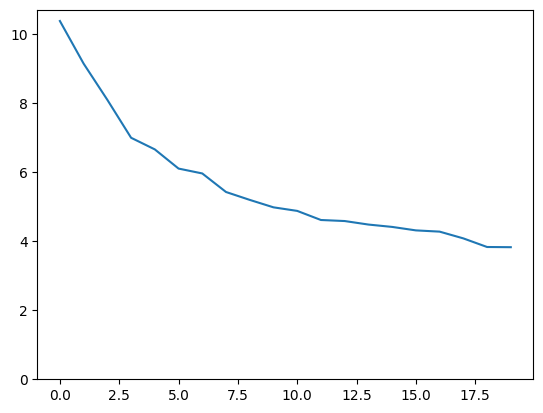

In [61]:
import pandas as pd

df = pd.DataFrame(metrics_basic_convergence)
df['train_losses'].plot(ylim = 0)

In [63]:
base_model = model.to(device)
convergence_optimizer = torch.optim.Adam(base_model.parameters(), lr = 1e-3)
metrics_pretrained_convergence = convergence_train(base_model, convergence_optimizer, 20, num_blocks = 4, patience=5, threshold=1e-3, moving_avg_window=5, stability_threshold=0.002)

Epoch 1, Train Loss: 7.7732, Val Loss: 7.7947
Epoch 2, Train Loss: 7.6371, Val Loss: 7.5576
Epoch 3, Train Loss: 7.5297, Val Loss: 7.6853
Epoch 4, Train Loss: 7.6747, Val Loss: 7.6275
Forcing block addition at epoch 4 due to period interval.
Added successfully
Epoch 5, Train Loss: 8.0677, Val Loss: 7.5446
Epoch 6, Train Loss: 7.6846, Val Loss: 7.5679
Epoch 7, Train Loss: 7.5153, Val Loss: 7.6471
Epoch 8, Train Loss: 7.7289, Val Loss: 7.3784
Forcing block addition at epoch 8 due to period interval.
Added successfully
Epoch 9, Train Loss: 8.2592, Val Loss: 8.0017
Epoch 10, Train Loss: 7.8362, Val Loss: 7.8383
Epoch 11, Train Loss: 7.7127, Val Loss: 7.6626
Epoch 12, Train Loss: 7.5311, Val Loss: 7.7036
Forcing block addition at epoch 12 due to period interval.
Added successfully
Epoch 13, Train Loss: 7.8606, Val Loss: 7.7902
Epoch 14, Train Loss: 7.5417, Val Loss: 7.5772
Epoch 15, Train Loss: 7.4674, Val Loss: 7.5309
Epoch 16, Train Loss: 7.6460, Val Loss: 7.4157
Forcing block addition at

<Axes: >

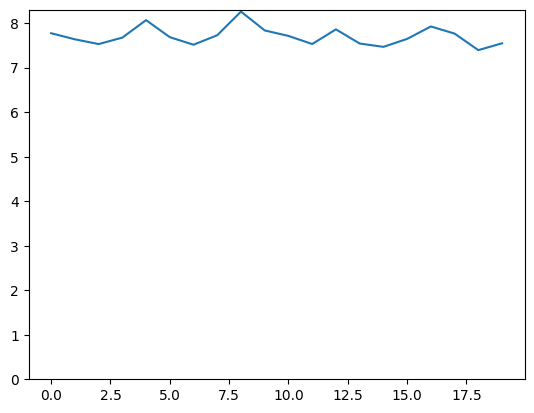

In [64]:
import pandas as pd

df = pd.DataFrame(metrics_pretrained_convergence)
df['train_losses'].plot(ylim = 0)

## FRAWGrow

In [66]:
# 0 -> 8
base_model = Model(1).to(device)
fragrow_optimizer = torch.optim.Adam(base_model.parameters(), lr = 1e-3)
metrics_basic_frawgrow = FRAWGrow_train(base_model, fragrow_optimizer, epochs=20, num_blocks=4, alpha=4.0, min_fine_tuning_epochs=100)

Epoch 1, Train Loss: 10.5483, Val Loss: 9.8303
Epoch 2, Train Loss: 9.3555, Val Loss: 8.6860
Epoch 3, Train Loss: 8.1726, Val Loss: 7.5193
Forcing block addition at epoch 4 due to period interval.
Added successfully
Epoch 4, Train Loss: 7.2167, Val Loss: 6.8061
Epoch 5, Train Loss: 6.6809, Val Loss: 6.4627
Epoch 6, Train Loss: 6.2034, Val Loss: 5.7960
Epoch 7, Train Loss: 5.8207, Val Loss: 5.8796
Forcing block addition at epoch 8 due to period interval.
Added successfully
Epoch 8, Train Loss: 5.5182, Val Loss: 5.3899
Epoch 9, Train Loss: 5.3802, Val Loss: 5.2591
Epoch 10, Train Loss: 5.0377, Val Loss: 5.0363
Epoch 11, Train Loss: 4.8043, Val Loss: 4.7054
Forcing block addition at epoch 12 due to period interval.
Added successfully
Epoch 12, Train Loss: 4.8562, Val Loss: 4.7632
Epoch 13, Train Loss: 4.8640, Val Loss: 4.6017
Epoch 14, Train Loss: 4.5393, Val Loss: 4.2025
Epoch 15, Train Loss: 4.1914, Val Loss: 4.3387
Forcing block addition at epoch 16 due to period interval.
Added succes

<Axes: >

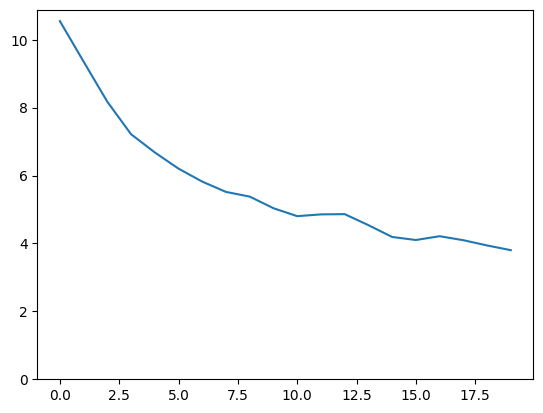

In [67]:
import pandas as pd

df = pd.DataFrame(metrics_basic_frawgrow)
df['train_losses'].plot(ylim = 0)

In [68]:
# 4 -> 8
base_model = model.to(device)
fragrow_optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
metrics_pretrained_frawgrow = FRAWGrow_train(base_model, fragrow_optimizer, epochs=20, num_blocks=4, alpha=4.0, min_fine_tuning_epochs=100)

Epoch 1, Train Loss: 7.6103, Val Loss: 7.6155
Epoch 2, Train Loss: 7.5213, Val Loss: 7.4096
Epoch 3, Train Loss: 7.6363, Val Loss: 7.5146
Forcing block addition at epoch 4 due to period interval.
Added successfully
Epoch 4, Train Loss: 7.5546, Val Loss: 7.6292
Epoch 5, Train Loss: 7.7145, Val Loss: 7.7231
Epoch 6, Train Loss: 7.5340, Val Loss: 7.4529
Epoch 7, Train Loss: 7.5846, Val Loss: 7.5655
Forcing block addition at epoch 8 due to period interval.
Added successfully
Epoch 8, Train Loss: 7.6540, Val Loss: 7.4879
Epoch 9, Train Loss: 8.1332, Val Loss: 7.4233
Epoch 10, Train Loss: 7.6751, Val Loss: 7.6114
Epoch 11, Train Loss: 7.6427, Val Loss: 7.3806
Forcing block addition at epoch 12 due to period interval.
Added successfully
Epoch 12, Train Loss: 7.4766, Val Loss: 7.6977
Epoch 13, Train Loss: 8.0648, Val Loss: 7.9252
Epoch 14, Train Loss: 7.6995, Val Loss: 7.6593
Epoch 15, Train Loss: 7.8076, Val Loss: 7.6467
Forcing block addition at epoch 16 due to period interval.
Added success

<Axes: >

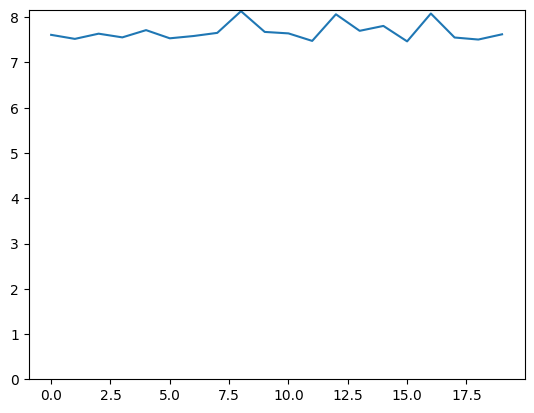

In [69]:
import pandas as pd

df = pd.DataFrame(metrics_pretrained_frawgrow)
df['train_losses'].plot(ylim = 0)

# Plots

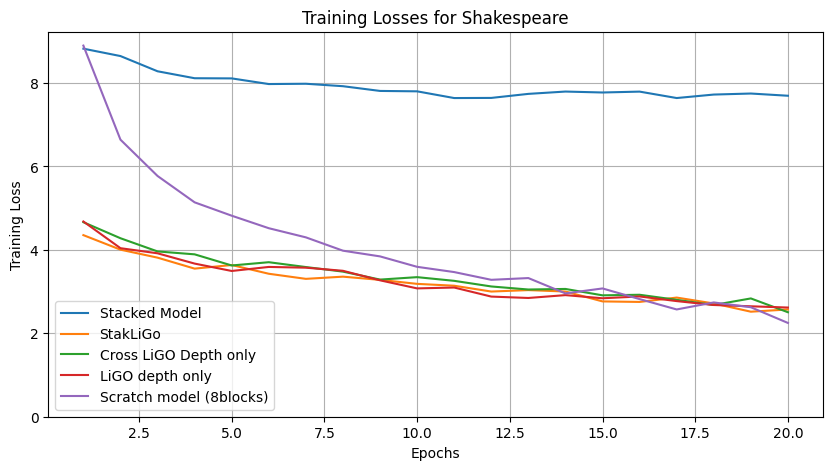

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Model names for reference
model_names = ["Stacked Model", "StakLiGo", "Cross LiGO Depth only", "LiGO depth only", "Scratch model (8blocks)"]
metrics_dfs = {
    "Stacked Model": pd.DataFrame(stacked_metrics),
    "StakLiGo": pd.DataFrame(sl_depth_metrics),
    "Cross LiGO Depth only": pd.DataFrame(cl_depth_metrics),
    "LiGO depth only": pd.DataFrame(ligo_depth_metrics),
    "Scratch model (8blocks)": pd.DataFrame(scratch_depth_width),
}

plt.figure(figsize=(10, 5))
for model1 in model_names:
    plt.plot(range(1, 21), metrics_dfs[model1]["train_losses"][:20], label=model1)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Losses for Shakespeare")
plt.legend()
plt.grid()
plt.ylim(bottom=0)  # Set Y-axis to start from 0
plt.show()


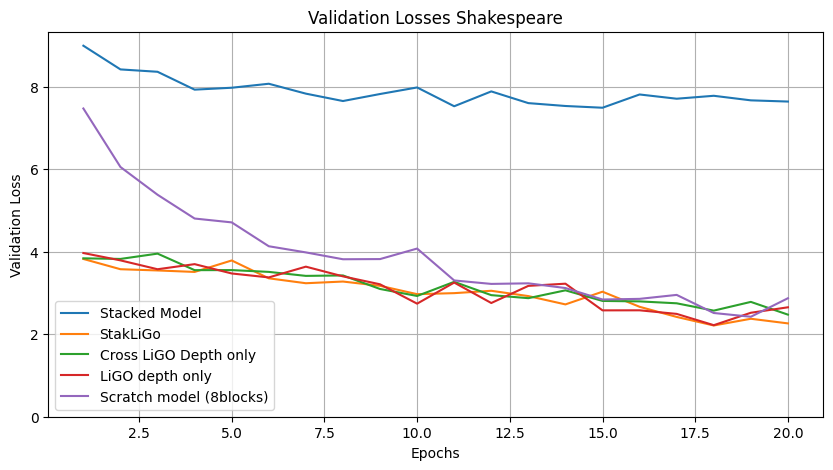

In [73]:
plt.figure(figsize=(10, 5))
for model1 in model_names:
    plt.plot(range(1, 21), metrics_dfs[model1]["val_losses"][:20], label=model1)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Losses Shakespeare")
plt.legend()
plt.grid()
plt.ylim(bottom=0)  # Set Y-axis to start from 0
plt.show()


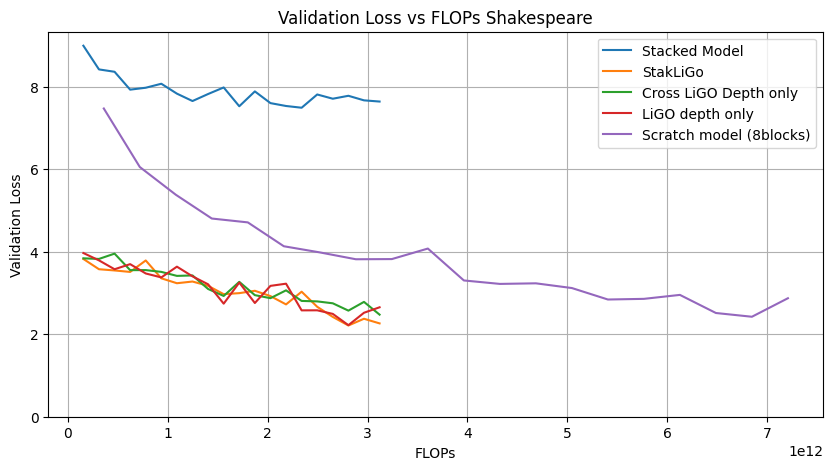

In [74]:
plt.figure(figsize=(10, 5))
for model1 in model_names:
    df = metrics_dfs[model1].sort_values(by="flops")  # Ensure FLOPs are sorted
    plt.plot(df["flops"], df["val_losses"], label=model1, linestyle='-')  # Line graph with markers
plt.xlabel("FLOPs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss vs FLOPs Shakespeare")
plt.legend()
plt.grid()
plt.ylim(bottom=0)  # Set Y-axis to start from 0
plt.show()


# All plots

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Model names for reference
model_names = [
    "Stacked Model",
    "StakLiGo",
    "Cross LiGO Depth only",
    "LiGO depth only",
    "Scratch model (8blocks)",
    "Base model (4blocks)",
    "Periodic pretrained 4 -> 8",
    "Periodic 0 -> 8",
    "Convergence pretrained 4 -> 8",
    "Convergence 0 -> 8",
    "FrawGrow pretrained 4 -> 8",
    "FrawGrow 0 -> 8"
]

metrics_dfs = {
    "Stacked Model": pd.DataFrame(stacked_metrics),
    "StakLiGo": pd.DataFrame(sl_depth_metrics),
    "Cross LiGO Depth only": pd.DataFrame(cl_depth_metrics),
    "LiGO depth only": pd.DataFrame(ligo_depth_metrics),
    "Scratch model (8blocks)": pd.DataFrame(scratch_depth_width),
    "Base model (4blocks)": pd.DataFrame(metrics_basic_Shakespeare),
    "Periodic pretrained 4 -> 8": pd.DataFrame(metrics_pretrained_periodic),
    "Periodic 0 -> 8": pd.DataFrame(metrics_basic_periodic),
    "Convergence pretrained 4 -> 8": pd.DataFrame(metrics_pretrained_convergence),
    "Convergence 0 -> 8": pd.DataFrame(metrics_basic_convergence),
    "FrawGrow pretrained 4 -> 8": pd.DataFrame(metrics_pretrained_frawgrow),
    "FrawGrow 0 -> 8": pd.DataFrame(metrics_basic_frawgrow),

}

### Training Loss

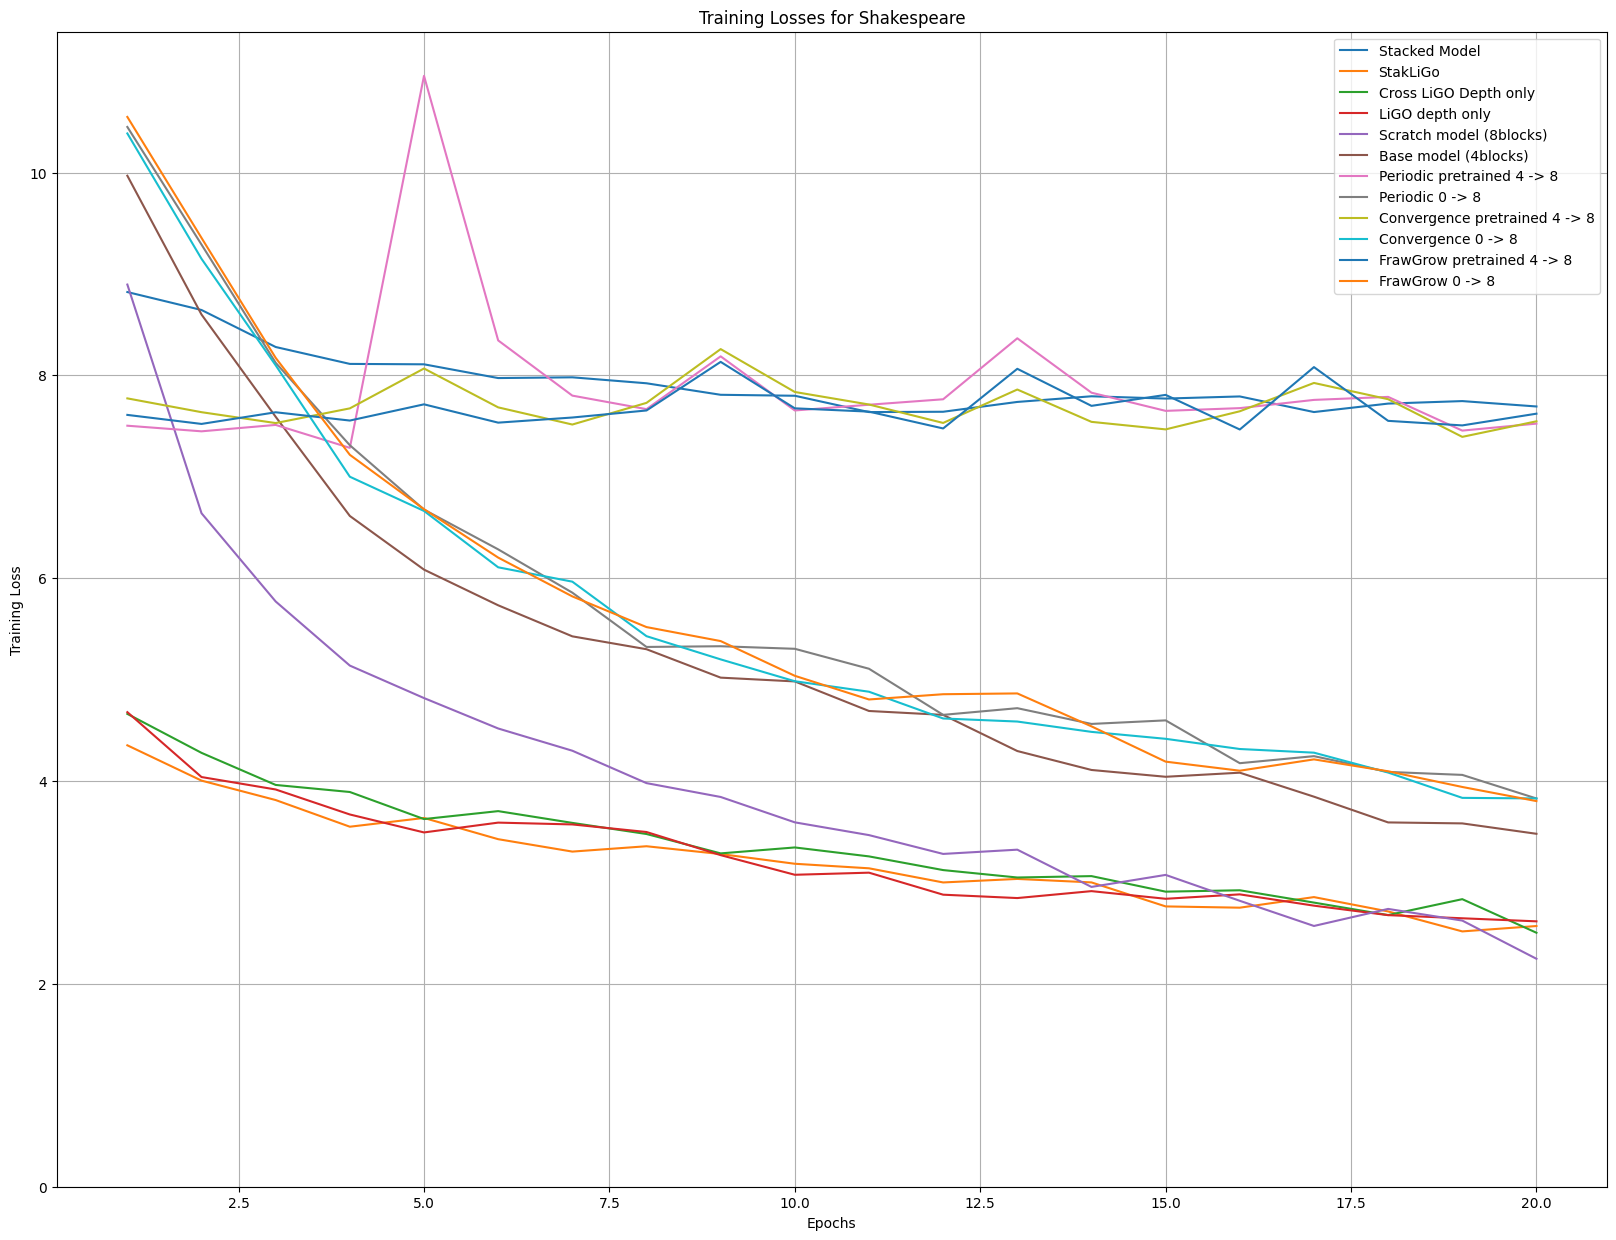

In [76]:
plt.figure(figsize=(20, 15))
for model1 in model_names:
    plt.plot(range(1, 21), metrics_dfs[model1]["train_losses"][:20], label=model1)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Losses for Shakespeare")
plt.legend()
plt.grid()
plt.ylim(bottom=0)  # Set Y-axis to start from 0
plt.show()


### Validation loss

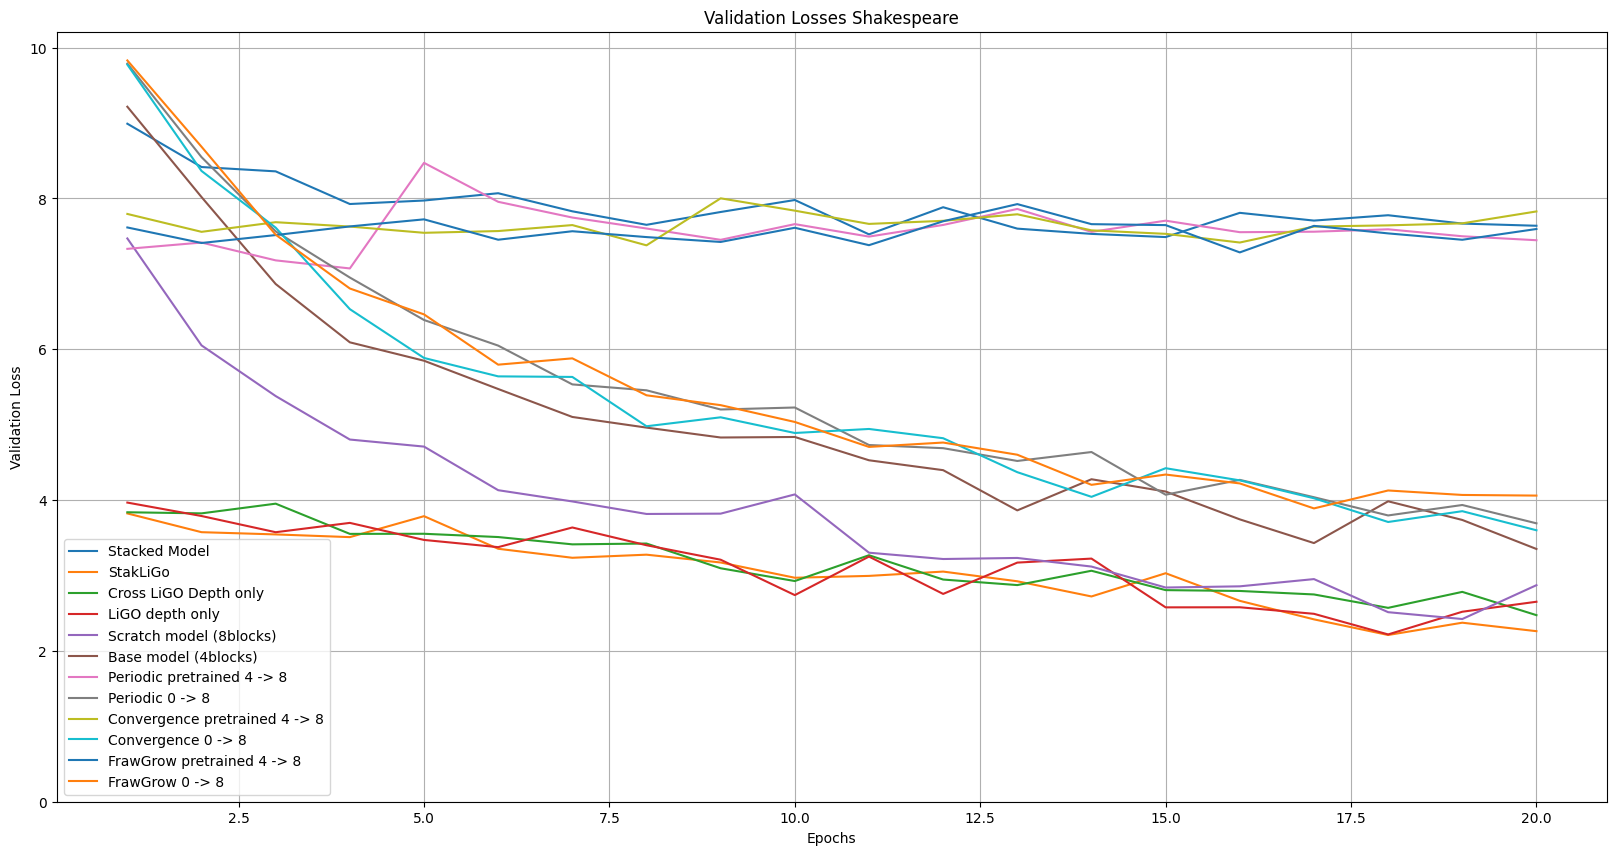

In [77]:
plt.figure(figsize=(20, 10))
for model1 in model_names:
    plt.plot(range(1, 21), metrics_dfs[model1]["val_losses"][:20], label=model1)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Losses Shakespeare")
plt.legend()
plt.grid()
plt.ylim(bottom=0)  # Set Y-axis to start from 0
plt.show()


### Validation Loss Vs. TFLOPs

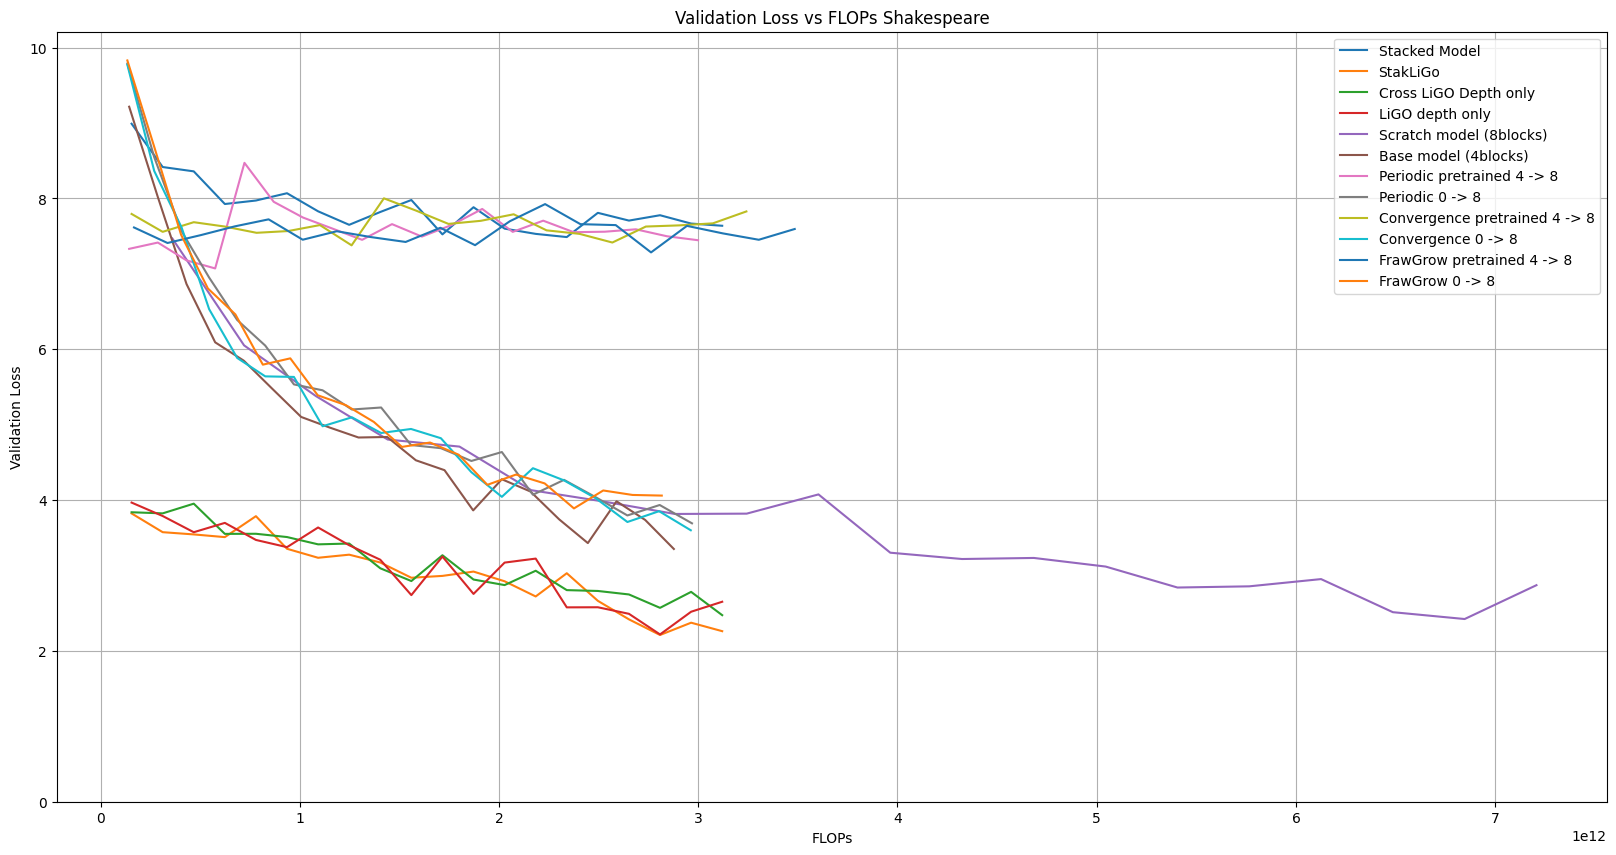

In [78]:
plt.figure(figsize=(20, 10))
for model1 in model_names:
    df = metrics_dfs[model1].sort_values(by="flops")  # Ensure FLOPs are sorted
    plt.plot(df["flops"], df["val_losses"], label=model1, linestyle='-')  # Line graph with markers
plt.xlabel("FLOPs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss vs FLOPs Shakespeare")
plt.legend()
plt.grid()
plt.ylim(bottom=0)  # Set Y-axis to start from 0
plt.show()


# When to Grow Policy

In [ ]:
epochs = 500
add_blocks = 4

## Periodic Growth

In [ ]:
# based on epochs and blocks -> each block will be added at epochs / (num_blocks+1)
# if epochs = 3, blocks = 2
# |-------base model--------|-----block1-----------|-----------block2----------|



## Convergence Growth

## LipGrow Method

## ORL FRAWGrow Policy

## Growth Order

## Appending

## Inserting in start

## RRS

# Hyperparameters

## α - learning rate